In [71]:
import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 18})
%matplotlib inline

# Unsupervised Learning: K-means clustering

**Unsupervised learning** learning from data when we do not have (or do not use) labels. It's used to find patterns in data, and learn about the system we're studying. 

There are many different types of unspervised algorithms, we're going to investigate one of the standard **clustering** algorithms which is used to identify clusters in data. 

Data and Code adapted from Mubaris at 
https://github.com/mubaris/friendly-fortnight/blob/master/kmeans-from-scratch-and-sklearn.py

First, we'll import all the libraries we need for this tutorial.

In [72]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

This is a little function to make the plots later.

In [73]:
def kmeans_plotter(clusters, k):
    colors = ['r', 'g', 'b', 'y', 'c', 'm', 'lightcoral', 'darkorange', 'purple', 'darkcyan']
    fig, ax = plt.subplots()
    for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=10, c=colors[i])
    ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

Use pandas (pd) to import some data.

In [74]:
# Importing the dataset
data = pd.read_csv('./friendly-fortnight-master/xclara.csv')
print("Input Data and Shape")
print(data.shape)
data.head()

Input Data and Shape
(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


The first step is to have a look at the data. 

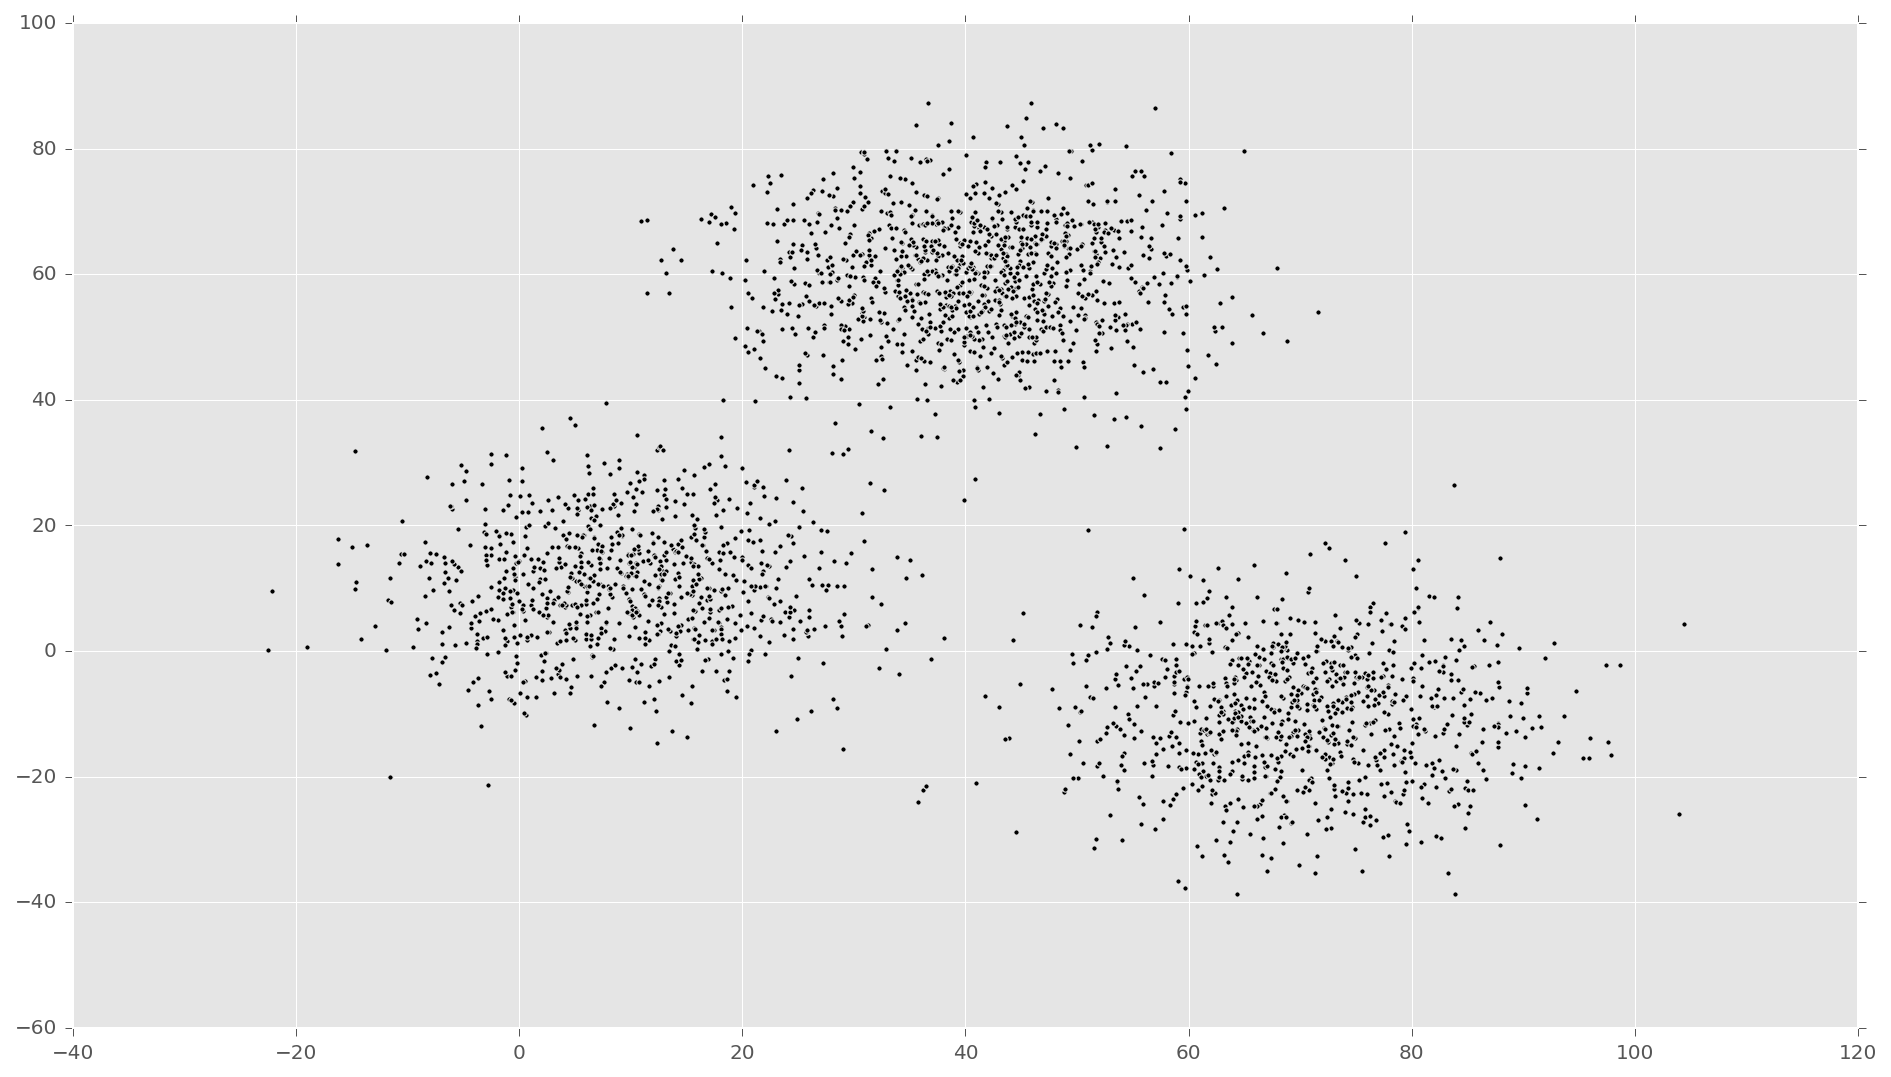

In [75]:
# Getting the values and plotting it
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

Human beings are great. I bet that you all agree with me that there are 3 clusters in that data, and you'd all draw circles around them in around the same place. 

How do you know which points belong to which cluster? Think of how you would define to a machine how to put the points together, it's hard isn't it? 

Clustering data is quite a hard problem for a computer to do. 

In this example, we're going to try and get a machine to cluster the data for us. 

This defines the distance between 2 points, we will be using this later, for now, don't worry about it.  

In [76]:
# Euclidean Distance Calculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

We're going to start off with k=2. Why? This data is 2-dimensional and easy to plot and see by eye that there are 3 clusters, but our date is usually of a much higher dimension. 

This code sets up and standard square error foreach value of k.

**start from here if you're re-running the k-means code**

In [77]:
# Number of clusters -
k = 2

This sets two initial starting points, called centroids (as we hope the centroids will end up at the centre of the clusters). We pick them randomly, noticed that if you run the code below a few times that you get different positions.

In [78]:
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print("Initial Centroids")
print(C)

Initial Centroids
[[ 72.  34.]
 [ 34.  65.]]


This plots the data with the initial guesses for the centroid.

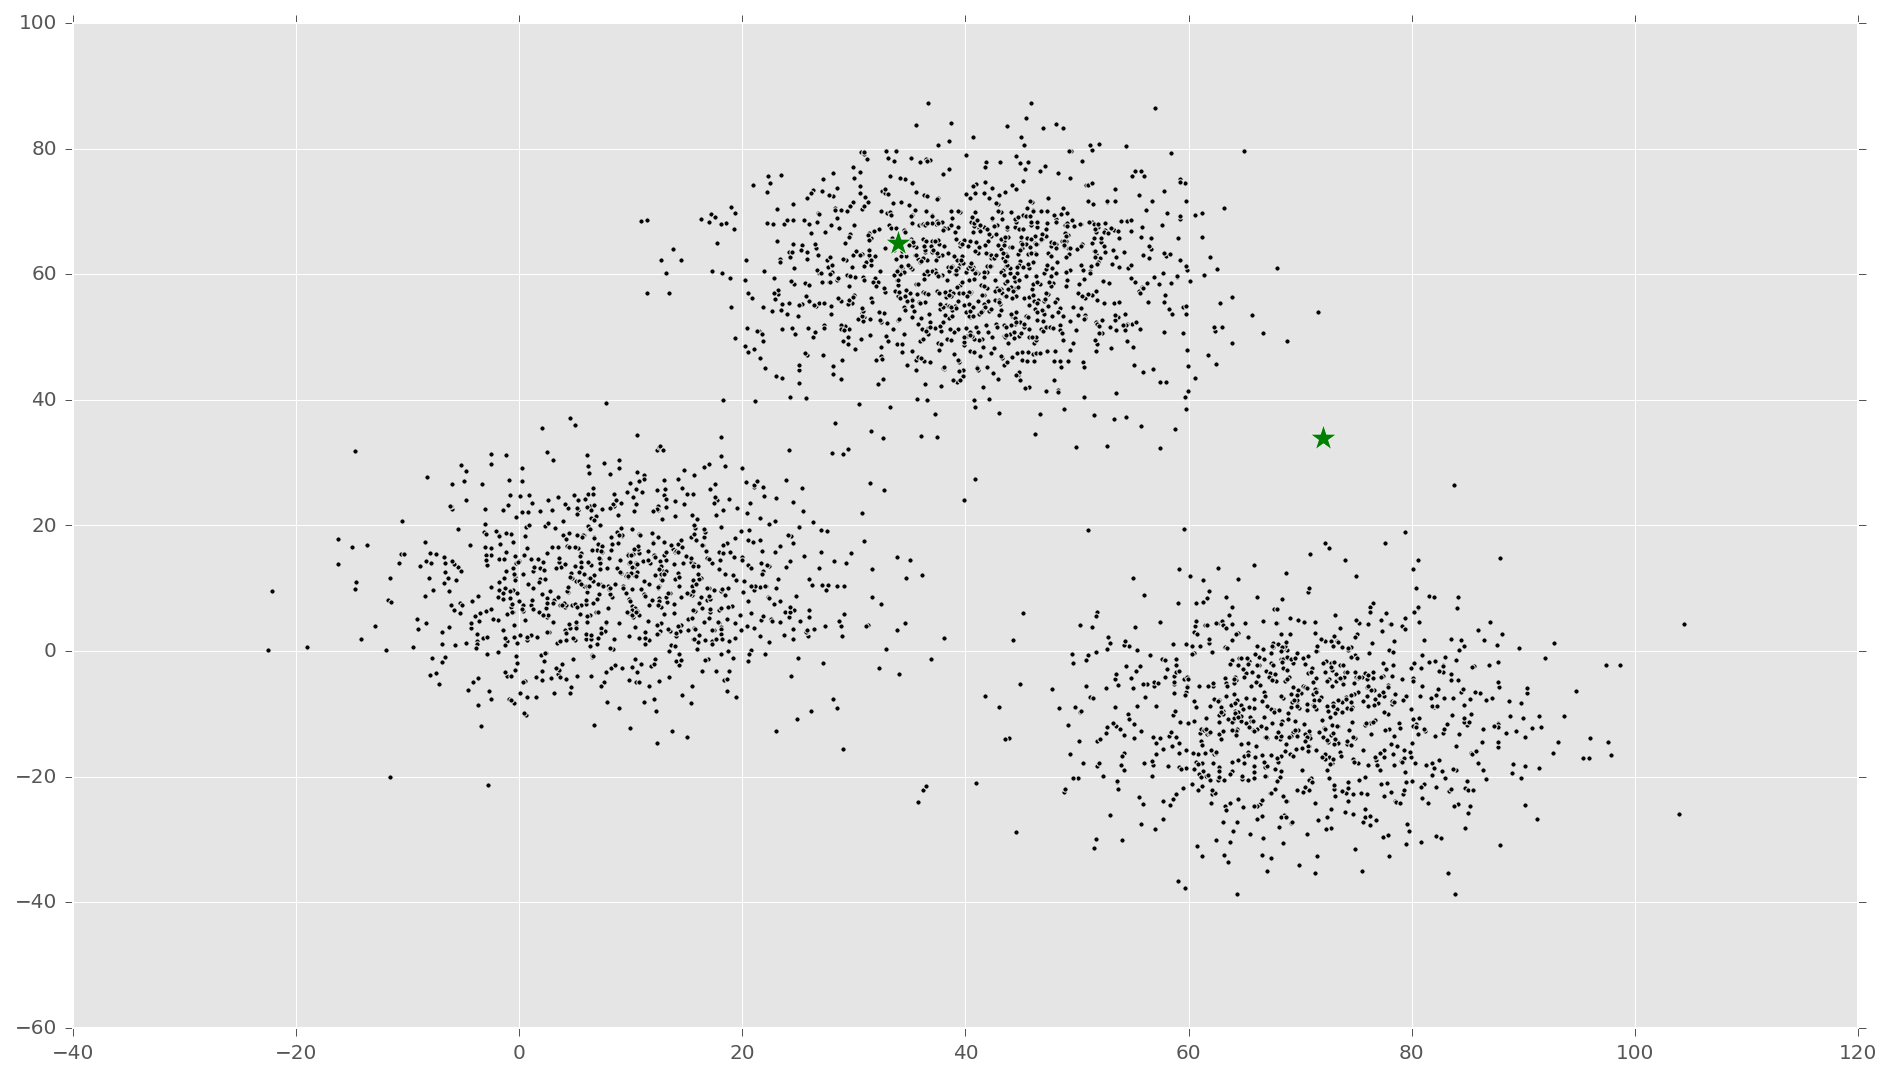

In [79]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

We update the positions of the centroids each step.  `clusters` is a matrix of which cluster a point belongs to. 

In [80]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
print("starting error is {}".format(error))

starting error is 108.2635672791175


47.7556
6.90569
1.87619
0.215968
0.0


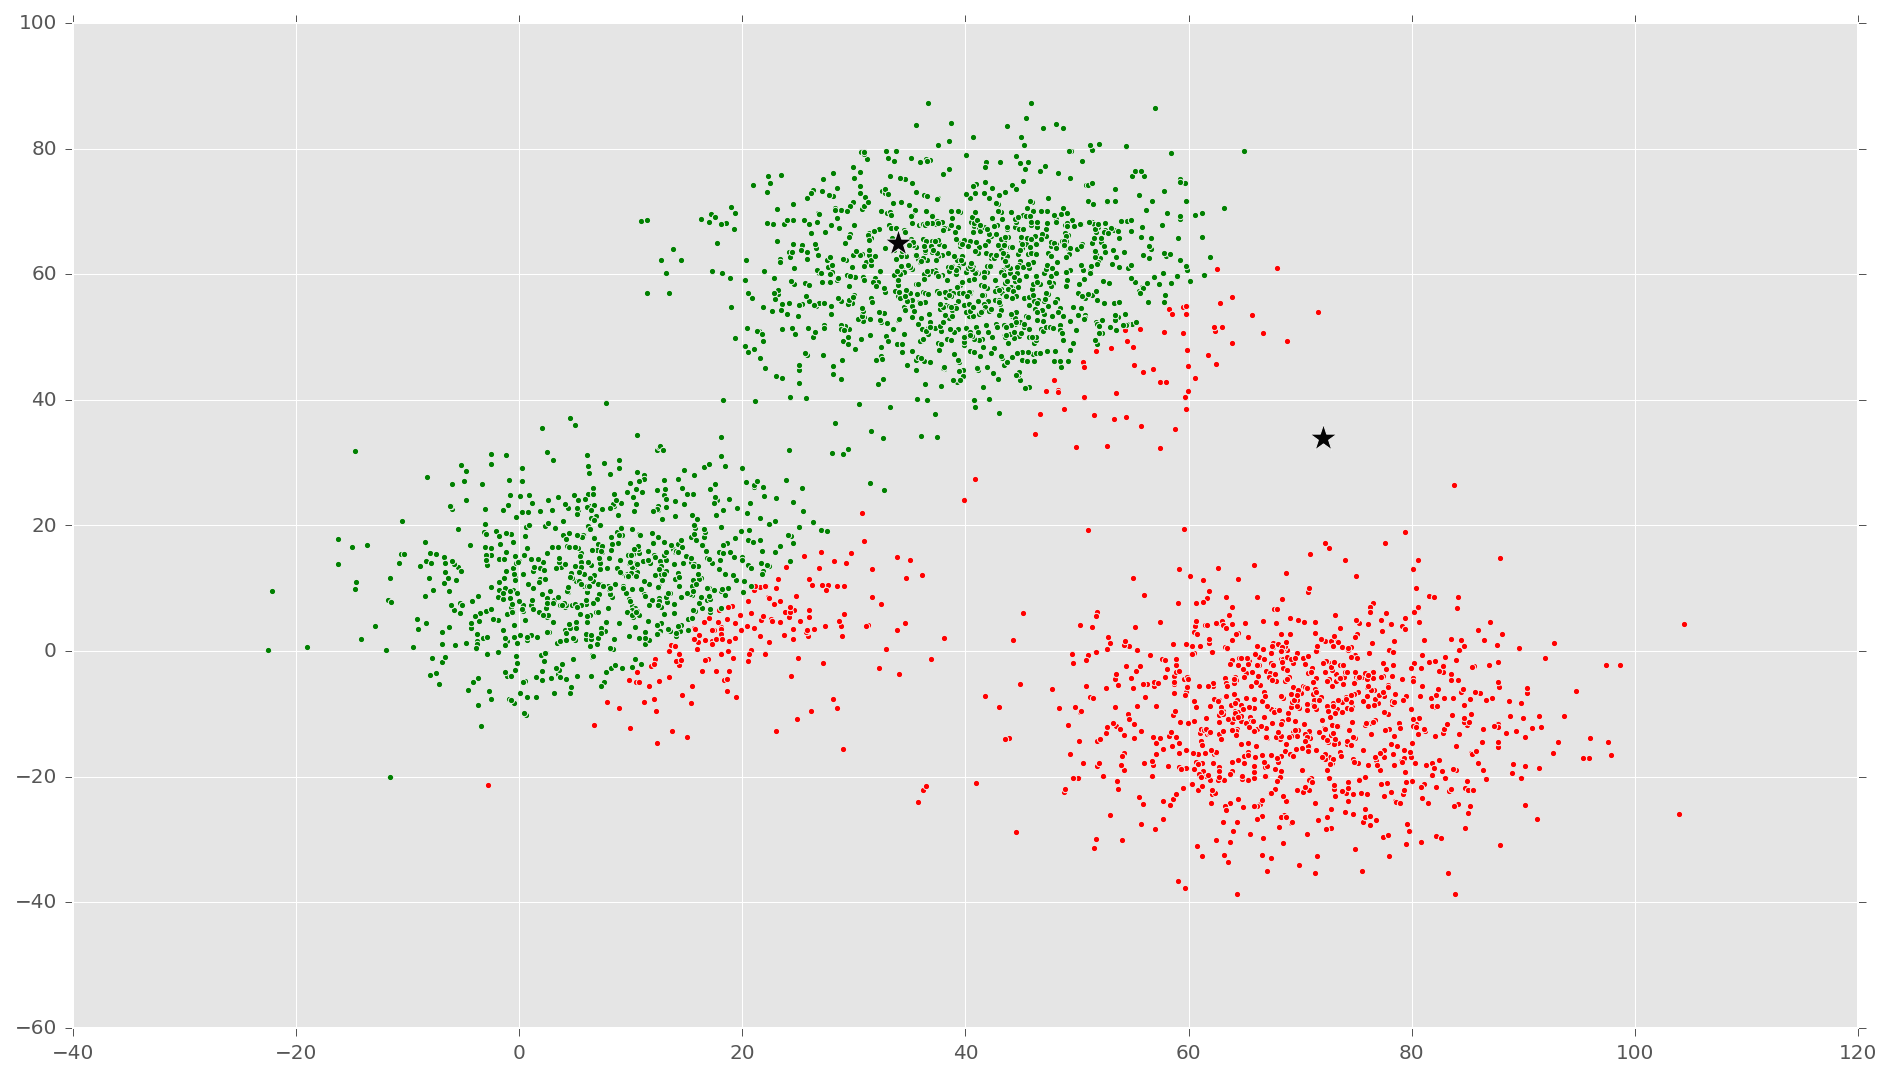

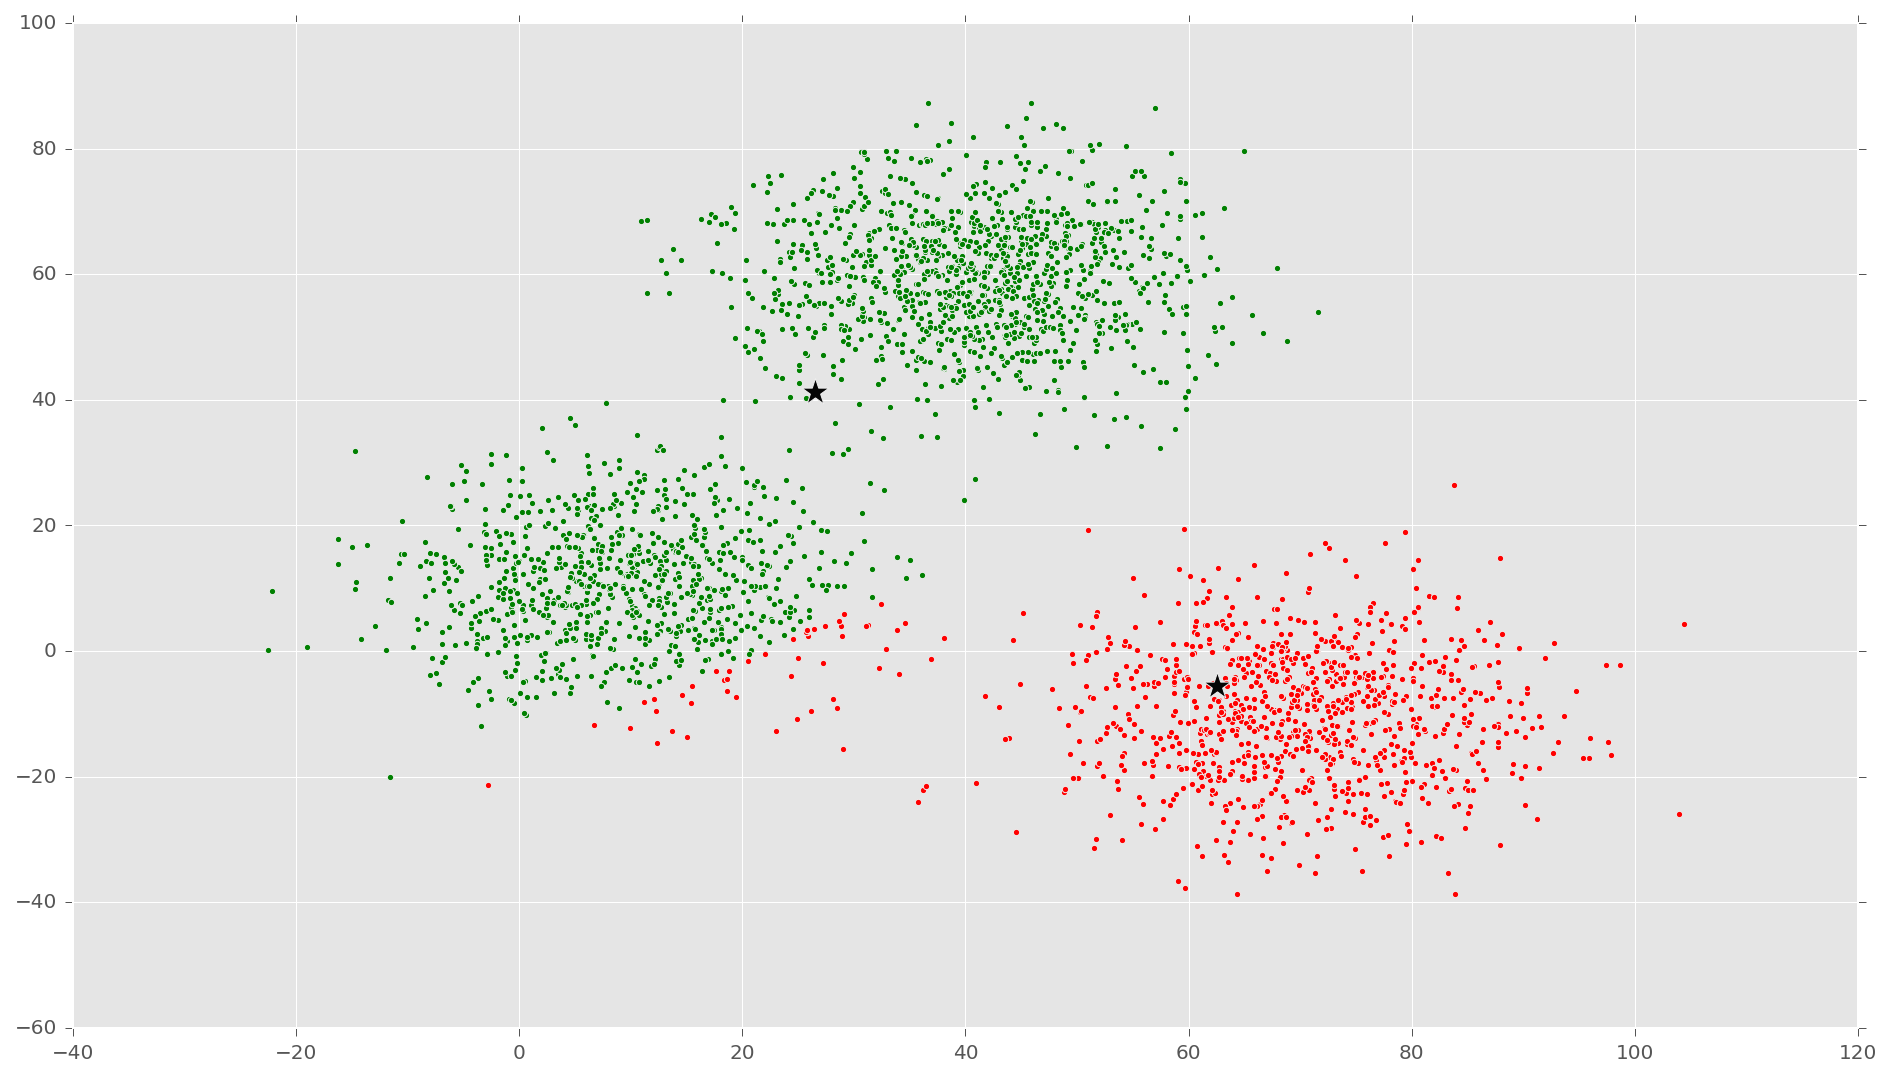

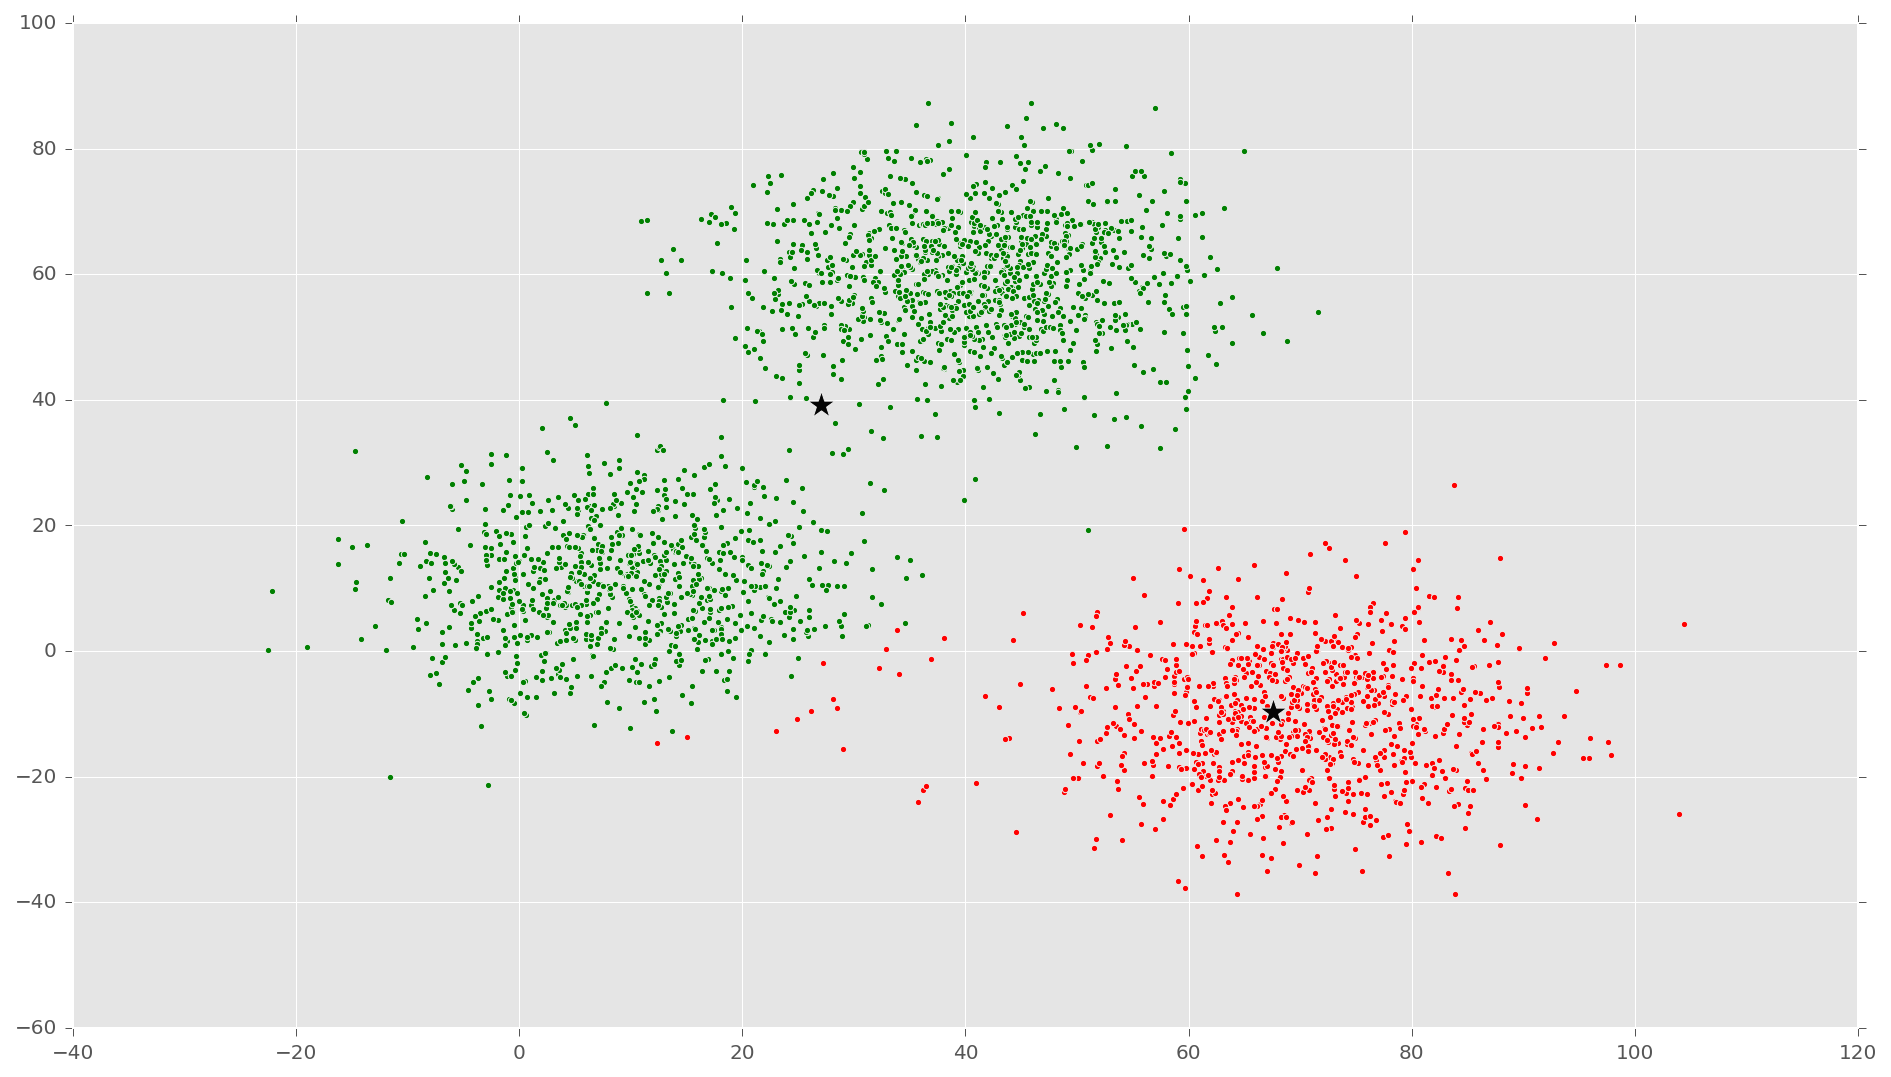

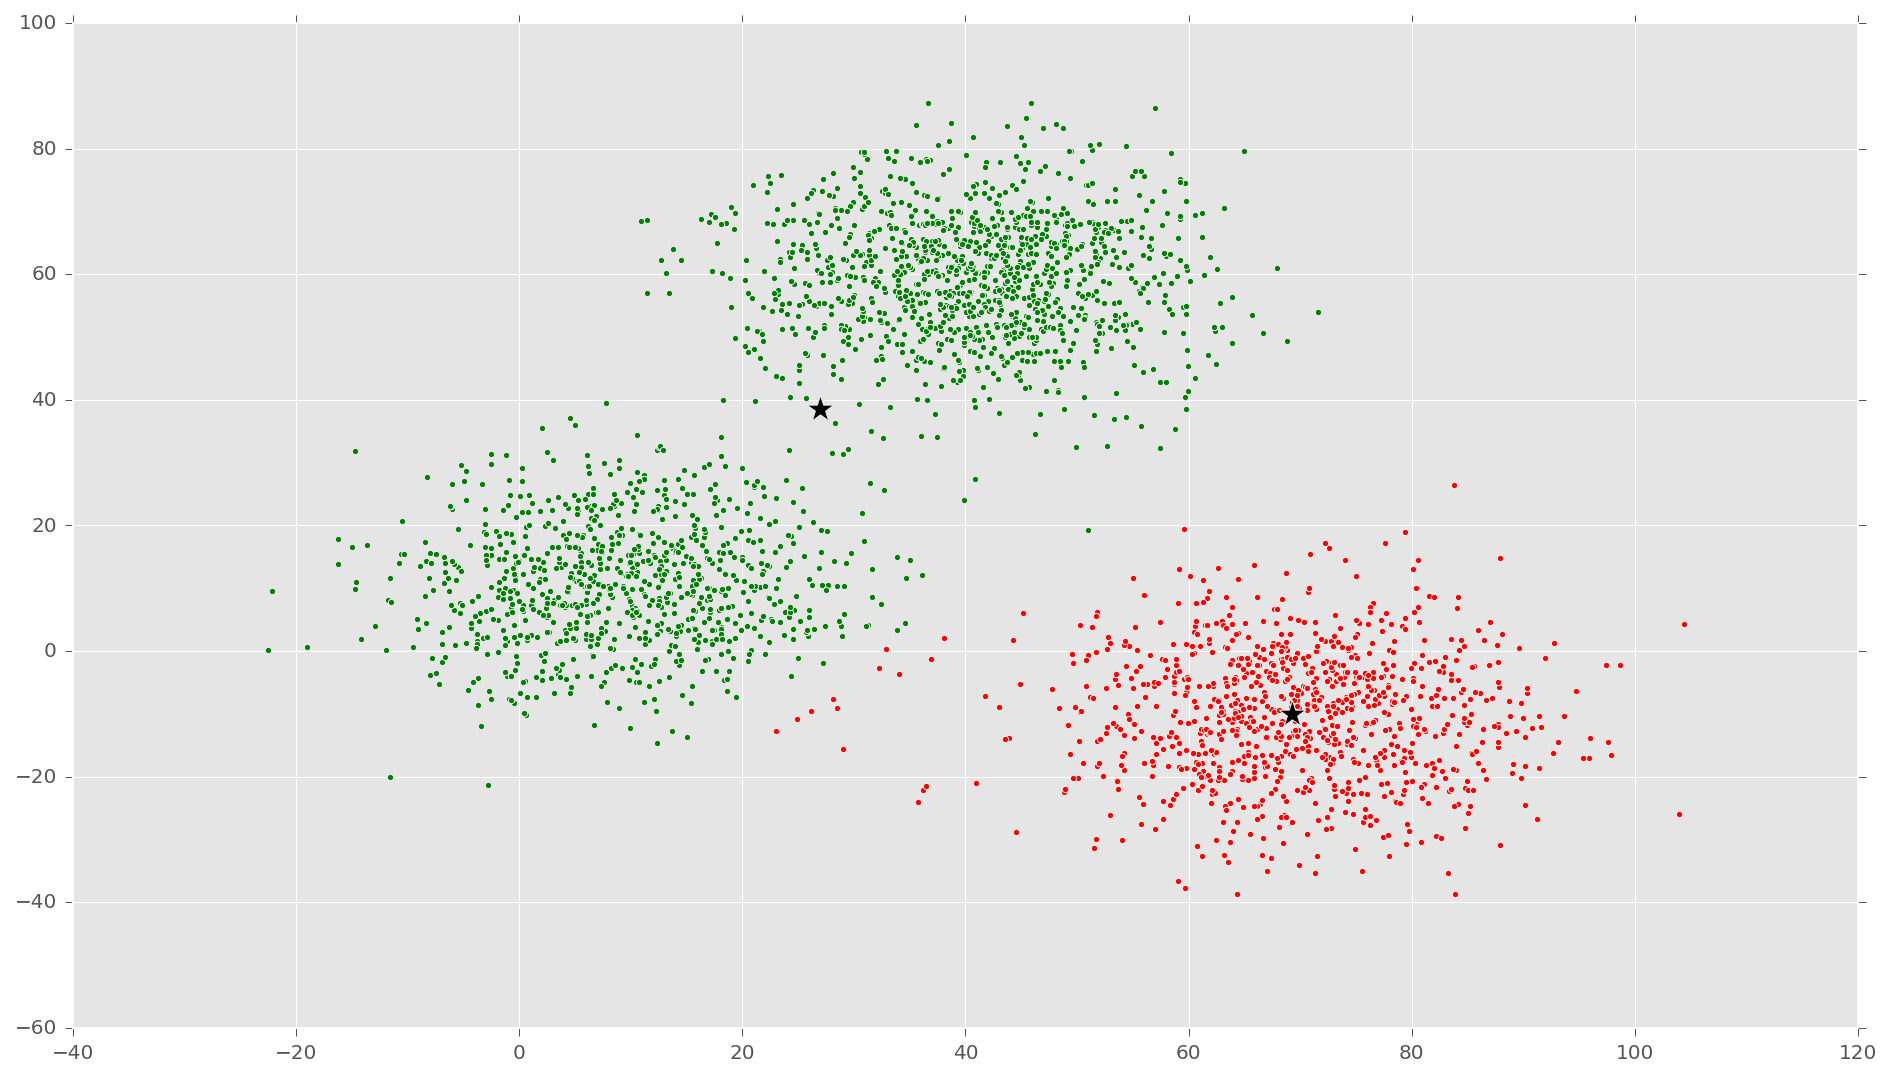

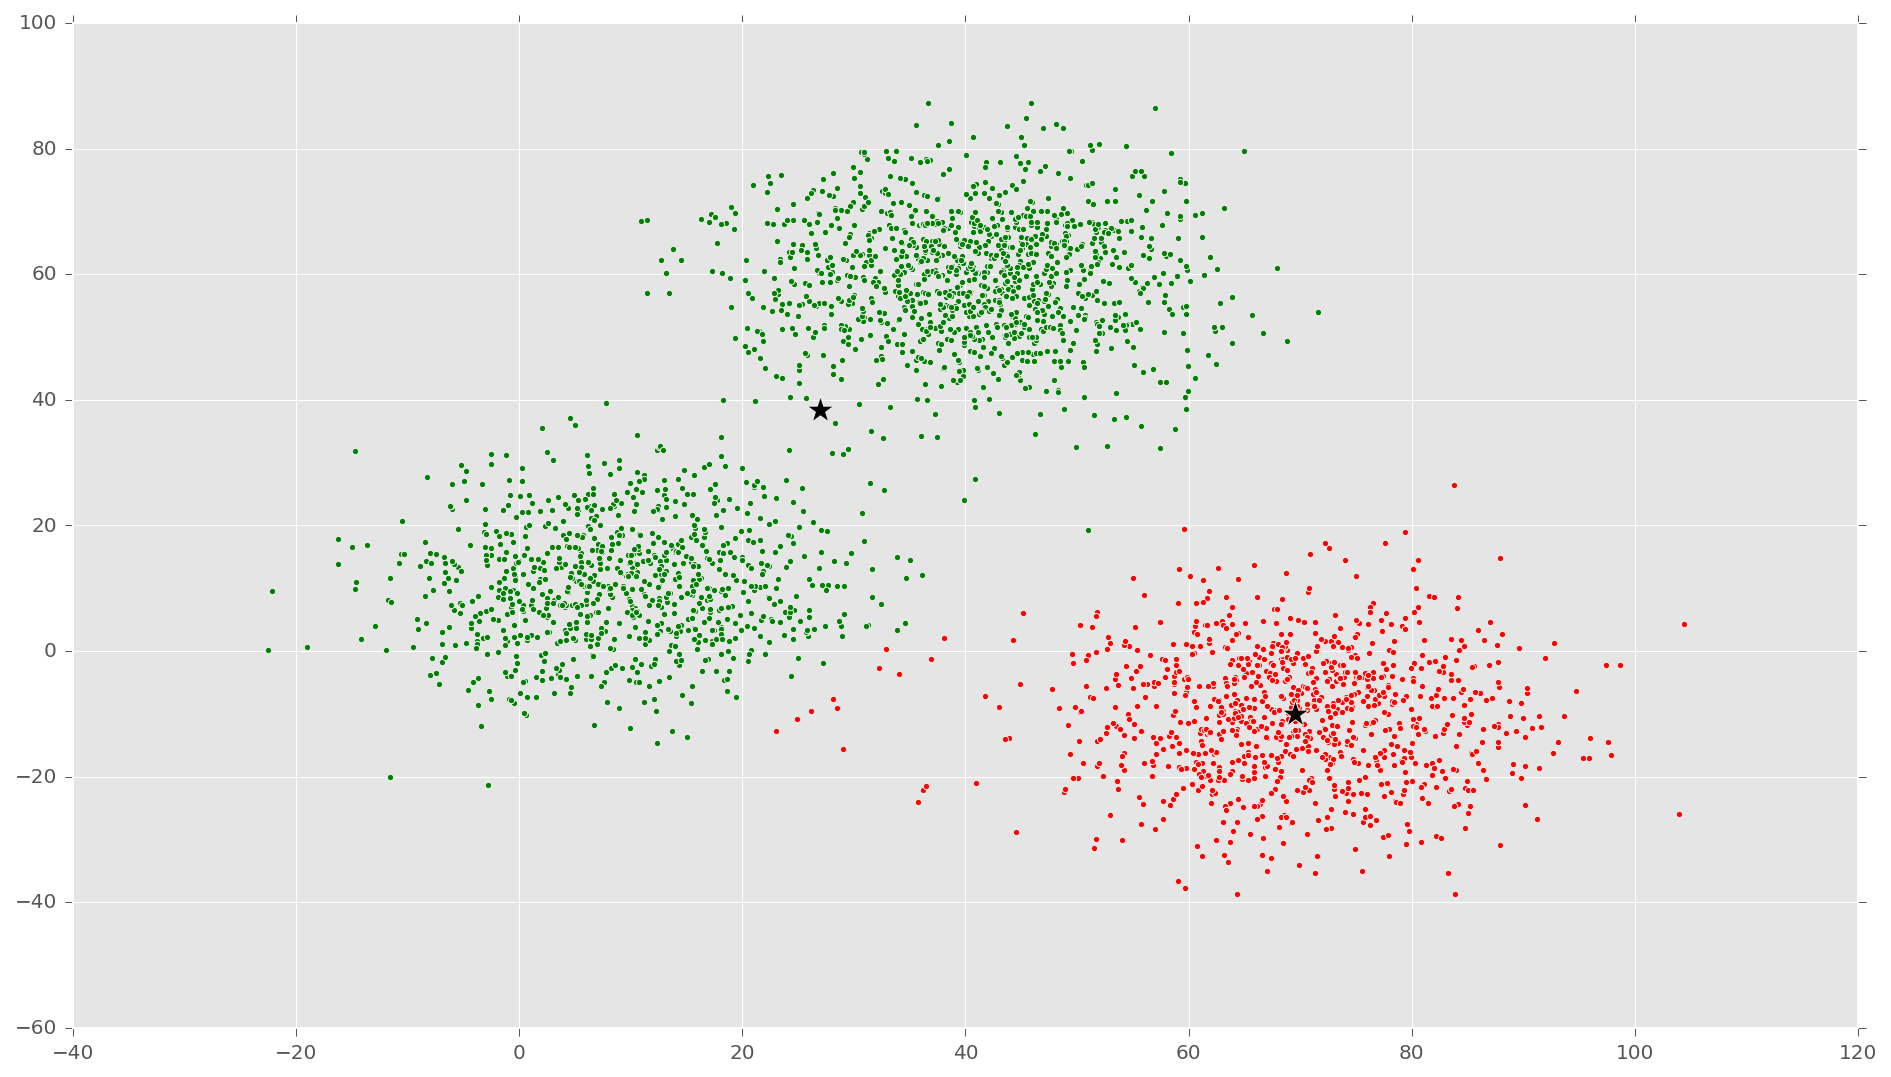

In [81]:
# Loop will run till the error becomes zero
error_list = [error]
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    kmeans_plotter(clusters=clusters, k=k)
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
    print(error)
    error_list.append(error)

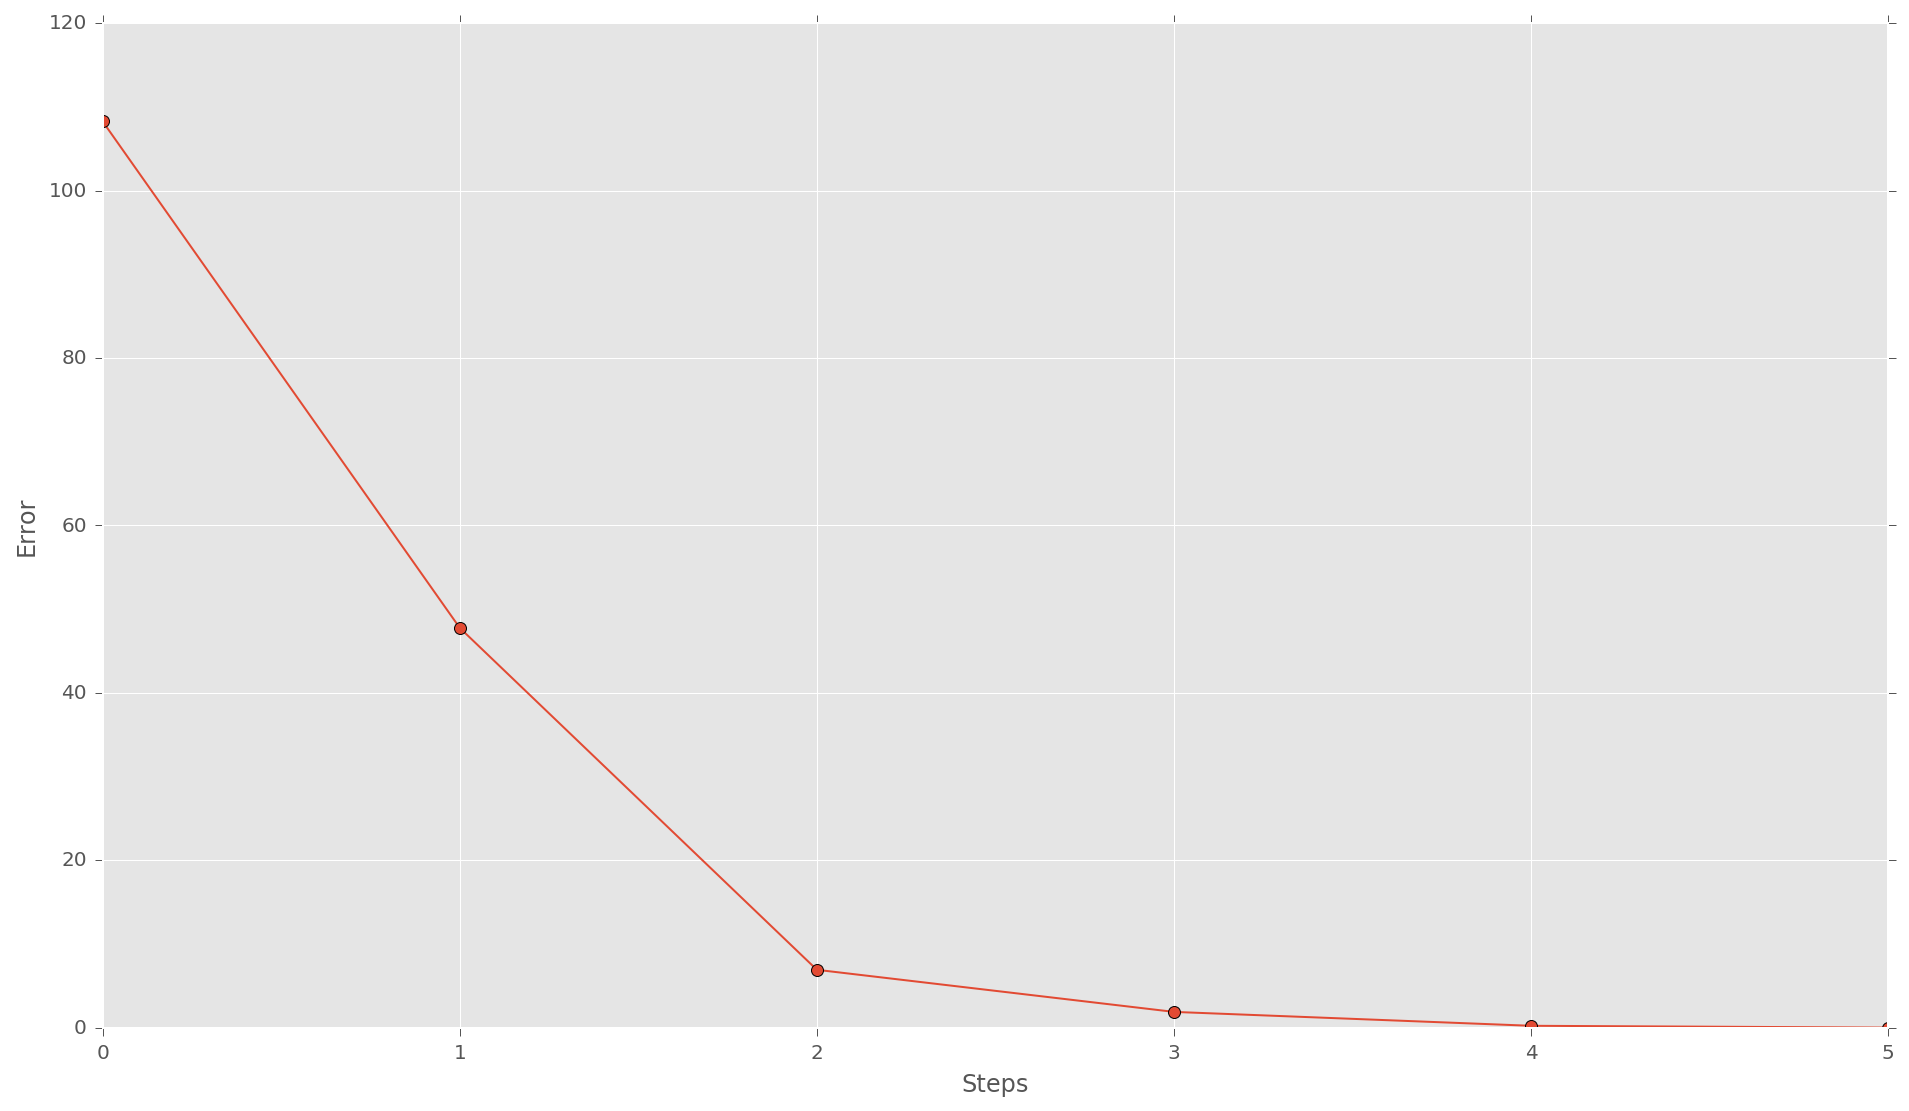

In [82]:
plt.plot(error_list, marker='o')
plt.xlabel('Steps')
plt.ylabel('Error')

This plots the final state of the k-means cluster allocation. 

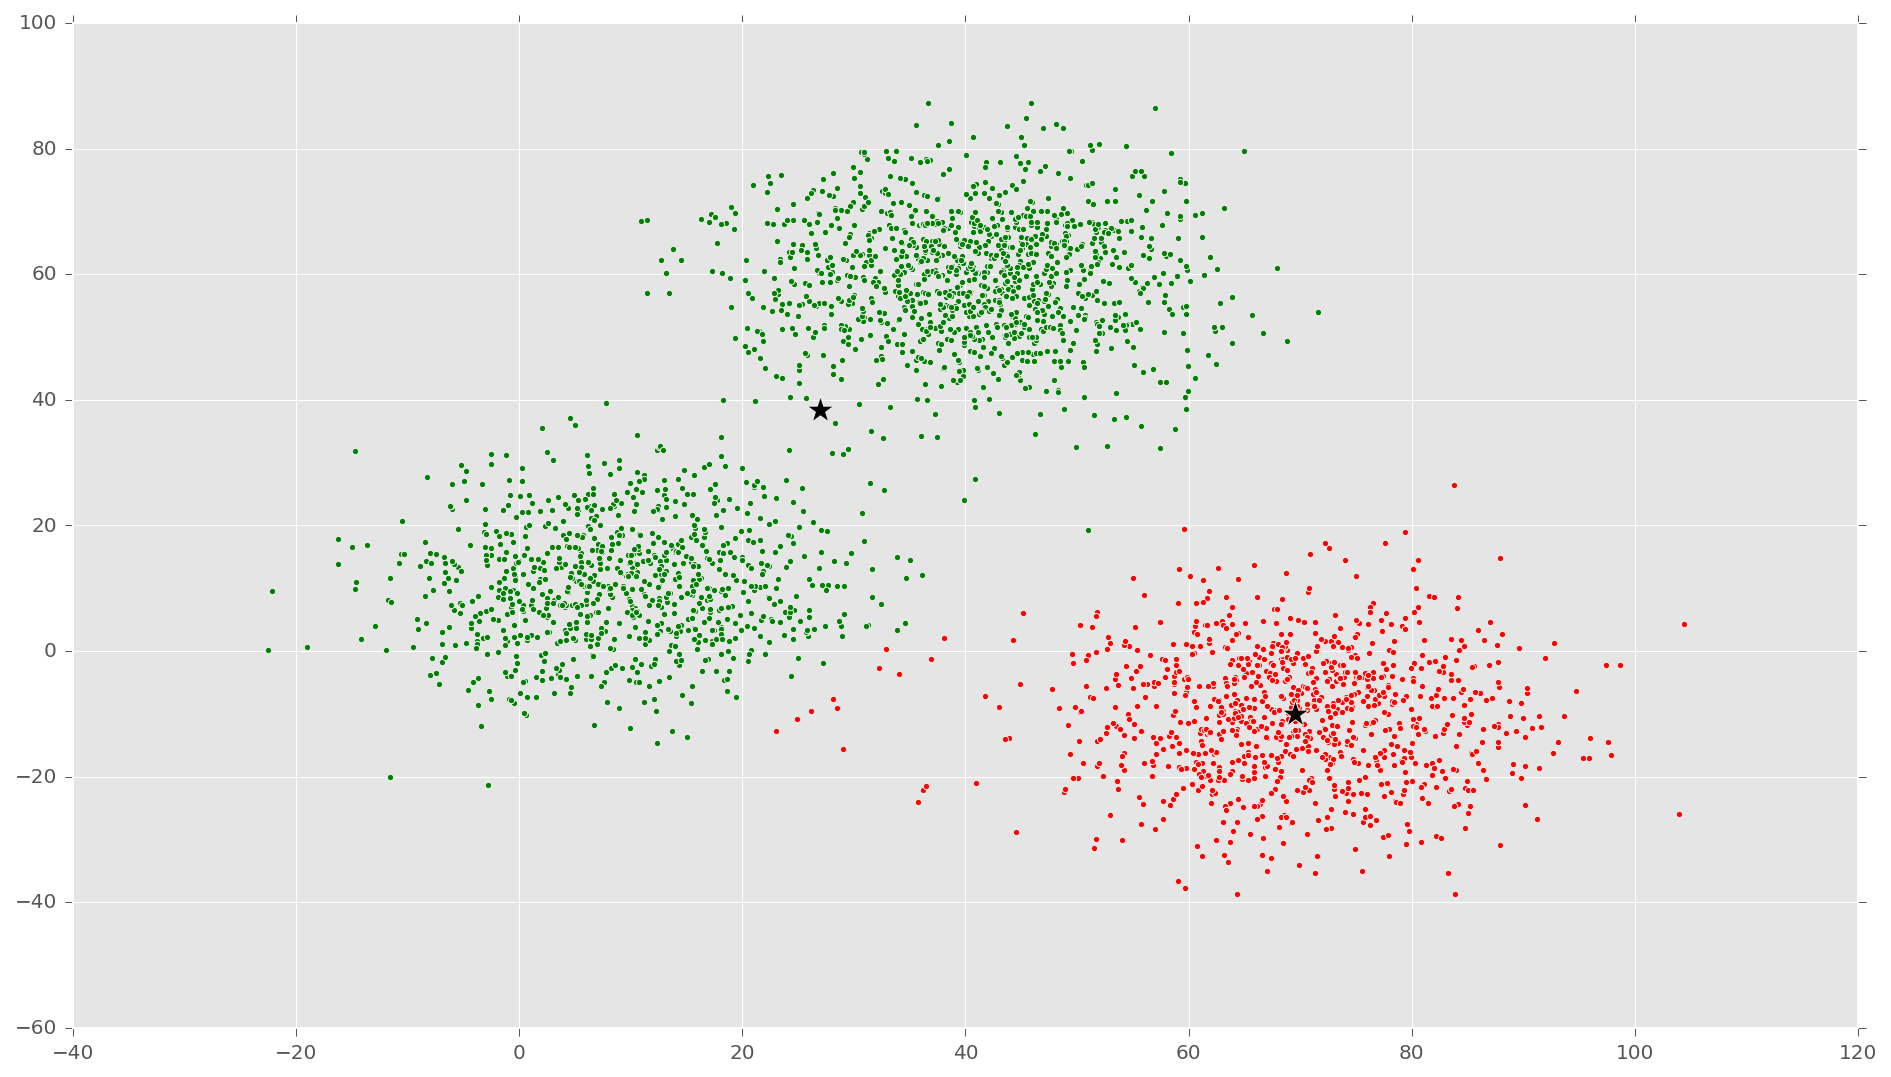

In [92]:
kmeans_plotter(clusters=clusters, k=k)

Now how do we find which value of k is best?

As it happens, KMeans is such a standard technique it is built in to sklearn, and instead of running the code by hand, we can just use the sklearn version, like this.

In [93]:
from sklearn.cluster import KMeans

In [94]:
# Number of clusters
kmeans = KMeans(n_clusters=k)

In [95]:
# Fitting the input data
kmeans = kmeans.fit(X)

In [96]:
# Getting the cluster labels
labels = kmeans.predict(X)

In [97]:
# Centroid values
centroids = kmeans.cluster_centers_

In [98]:
# Comparing with scikit-learn centroids
print("Centroid values")
print("Scratch")
print(C) # From Scratch
print("sklearn")
print(centroids) # From sci-kit learn

Centroid values
Scratch
[[ 69.49144745 -10.10803699]
 [ 26.97904778  38.42510223]]
sklearn
[[ 26.97904841  38.42510047]
 [ 69.49144971 -10.10803707]]


To evaulate the k-means clusters, we calculate the sum of squared error (SSE). 
For each point, get the distance between a point x and the centroid of the cluster, then square that distance and sum for all points. 
$$
SSE = \sum_{i=1}^{k} \sum_{x \in C_i} (dist(i, centroid_c))^2
$$
We could simply sum the distances, but as some will be positive and some negative they could cancel out and gives us a lower measure. So we square the errors instead. 

Yesterday, in the regression workshop we used $R^2$ values, which is the sum of squared distances between the points and the model (i.e. the best fit line). The SSE is the same thing, except here we are care about the distance to the nearest cluster.

In the KMeans package, the SSE is given by `.inertia_`

## Change SSE_2 to match the current value of K

Forina, M. et al, PARVUS -
An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.

In [150]:

string_command = "SSE_" + str(k) +" = kmeans.inertia_"
print(string_command)
eval(string_command)

SSE_9 = kmeans.inertia_


SyntaxError: invalid syntax (<string>, line 1)

In [152]:
SSE_9 = kmeans.inertia_
SSE_9

273635.10651348438

In [132]:
# This gives the SSE for kmeans
SSE_2= kmeans.inertia_

# **Exercise: Elbow method of determining the best value of k**

Repeat the above code by hand, changing the values of k and rerun. You may want to do this a few times to see how different solutions are. 
Each time you use a new value of $k$, assign ti to the  `SSE_k` value like this:
`SSE_2 = kmeans.inertia_` or `SSE_3 = kmeans.inertia_` etc. **Do this for k from 1 to 10**.

(note that we assigned SSE_1-SSE_10 to empty matrices earlier in this notebook).  

Do this for k up to 10. Then run the code below.

In [105]:
x_for_SSE = [1,2,3,4,5,6,7,8,9,10]
sse_a =[SSE_1, SSE_1, SSE_2, SSE_3, SSE_4, SSE_5, SSE_6, SSE_7, SSE_8, SSE_9, SSE_10]

In [154]:
sse = {}
# # this loop runs over k from 0 to 9
for k in range(10):
    # this line does k-means on the data (fitting it)
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    # this sets up the clusters for each point
    data["clusters"] = kmeans.labels_
    # this assigns the SSE for each value of k
    sse[k] = kmeans.inertia_ 
    print("k is: {}, SSE is {}".format{k, sse[k]})
sse
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

SyntaxError: invalid syntax (<ipython-input-154-ad44185f5f31>, line 10)

k is 1: SSE is 594.0446666666667
k is 2: SSE is 133.4571484147053
k is 3: SSE is 71.99219125955467
k is 4: SSE is 54.45235714285714
k is 5: SSE is 40.47085714285714
k is 6: SSE is 32.984510605014954
k is 7: SSE is 29.419020128824478
k is 8: SSE is 26.530713710605017
k is 9: SSE is 24.101737102417882


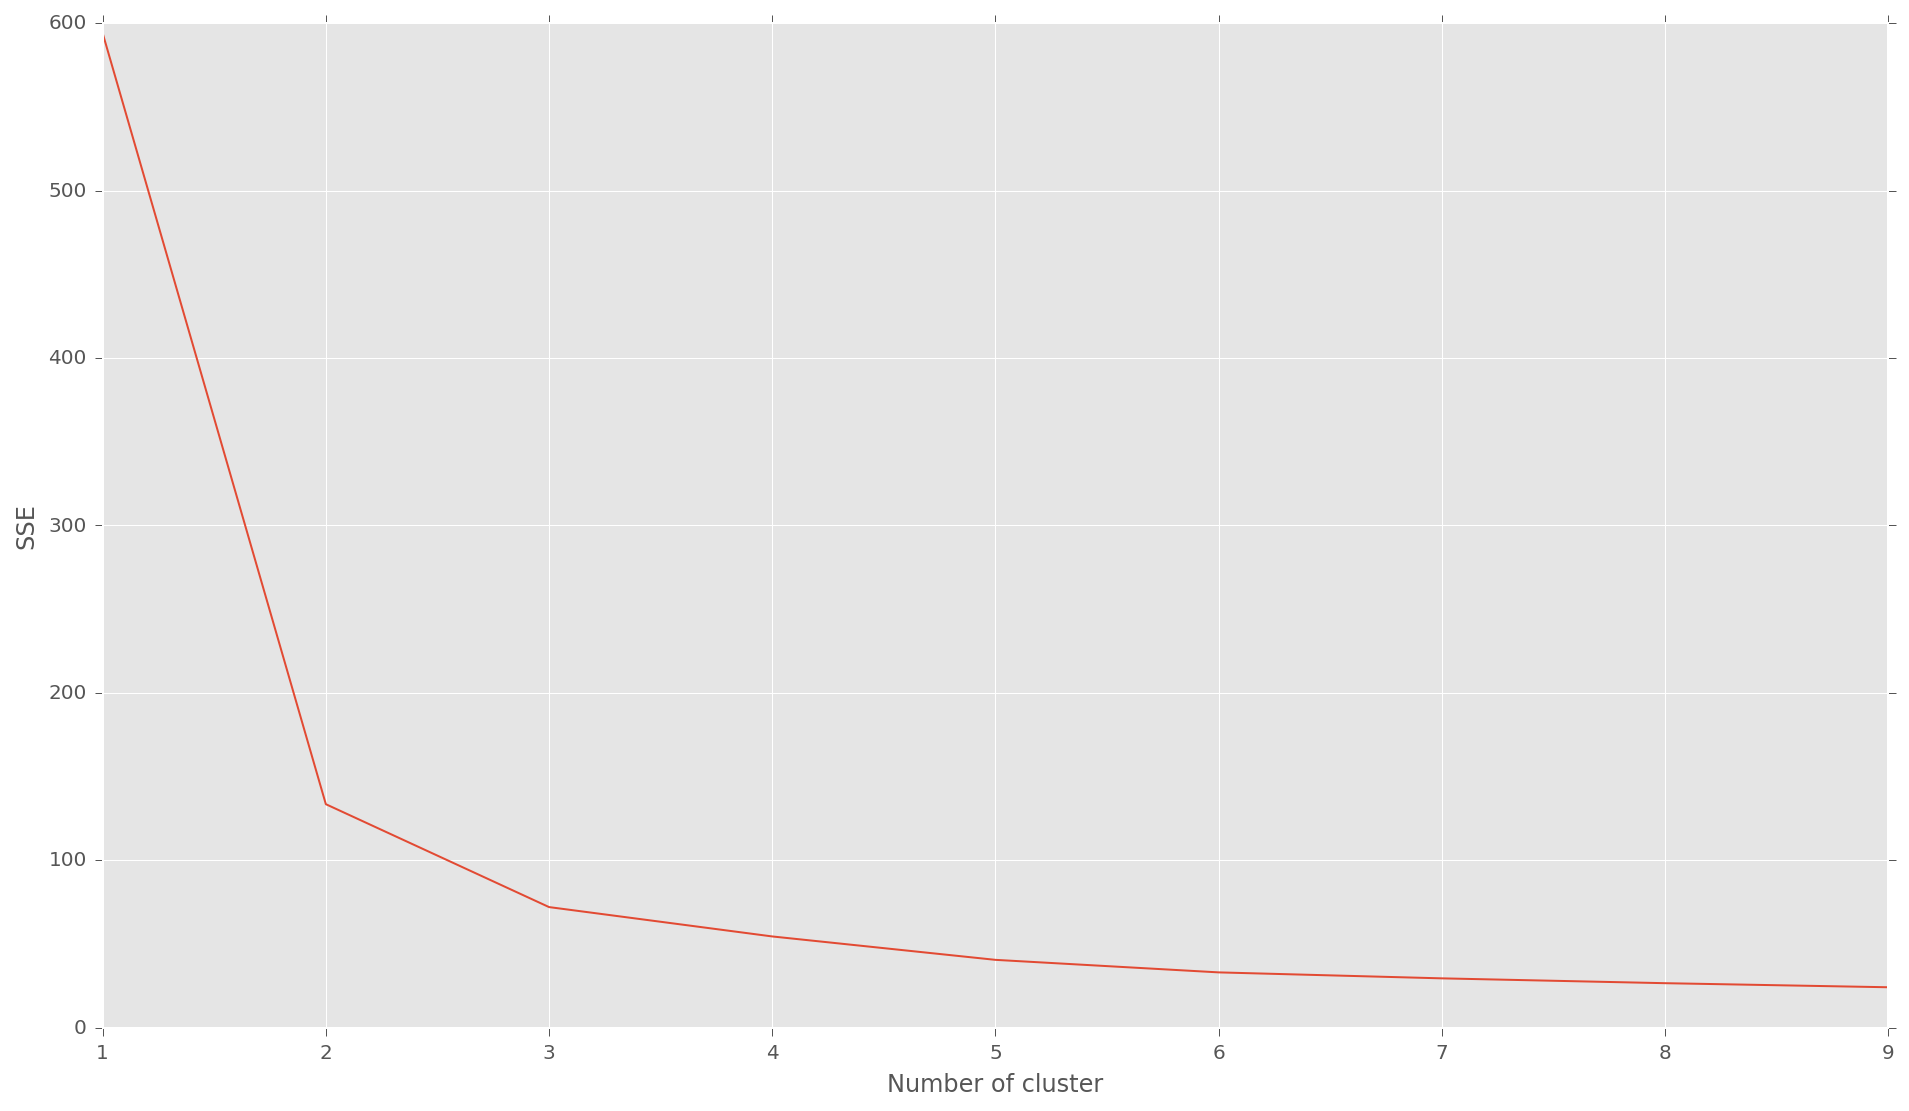

In [156]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris['feature_names'])
#print(X)
data = X[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']]

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    print("k is {}: SSE is {}". format(k, sse[k]))
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

The `elbow` of the grpah is the point where increase does not greatly reduce the error. It should be 3 in this graph, as going to k is more than 4 offers only a very small improvement in SSE. 

In [203]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

X = load_iris().data
y = load_iris().target

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.6808136202787941
For n_clusters=3, The Silhouette Coefficient is 0.5525919445309032
For n_clusters=4, The Silhouette Coefficient is 0.49782569008681465
For n_clusters=5, The Silhouette Coefficient is 0.4910127633001969
For n_clusters=6, The Silhouette Coefficient is 0.36820569663414005
For n_clusters=7, The Silhouette Coefficient is 0.3491743019630393
For n_clusters=8, The Silhouette Coefficient is 0.35367864245889574
For n_clusters=9, The Silhouette Coefficient is 0.323093091749079
For n_clusters=10, The Silhouette Coefficient is 0.32879504724810343


https://towardsdatascience.com/k-means-clustering-of-wine-data-95bac074baae

The data set that we are going to analyze in this post is a result of a chemical analysis of wines grown in a particular region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. The attributes are: Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines, and Proline. 

In [157]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wine_names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', \
              'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315',\
              'Proline']
wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names = wine_names) 
wine_df = pd.DataFrame(wine_data)


In [158]:
wine_df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


C:\Users\ella.xenon\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x2d2f0509be0>,
 'caps': [<matplotlib.lines.Line2D at 0x2d2f0685940>,
 'fliers': [<matplotlib.lines.Line2D at 0x2d2f0655898>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2d2f06944a8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x2d2f064c5f8>,
  <matplotlib.lines.Line2D at 0x2d2ec16d898>]}

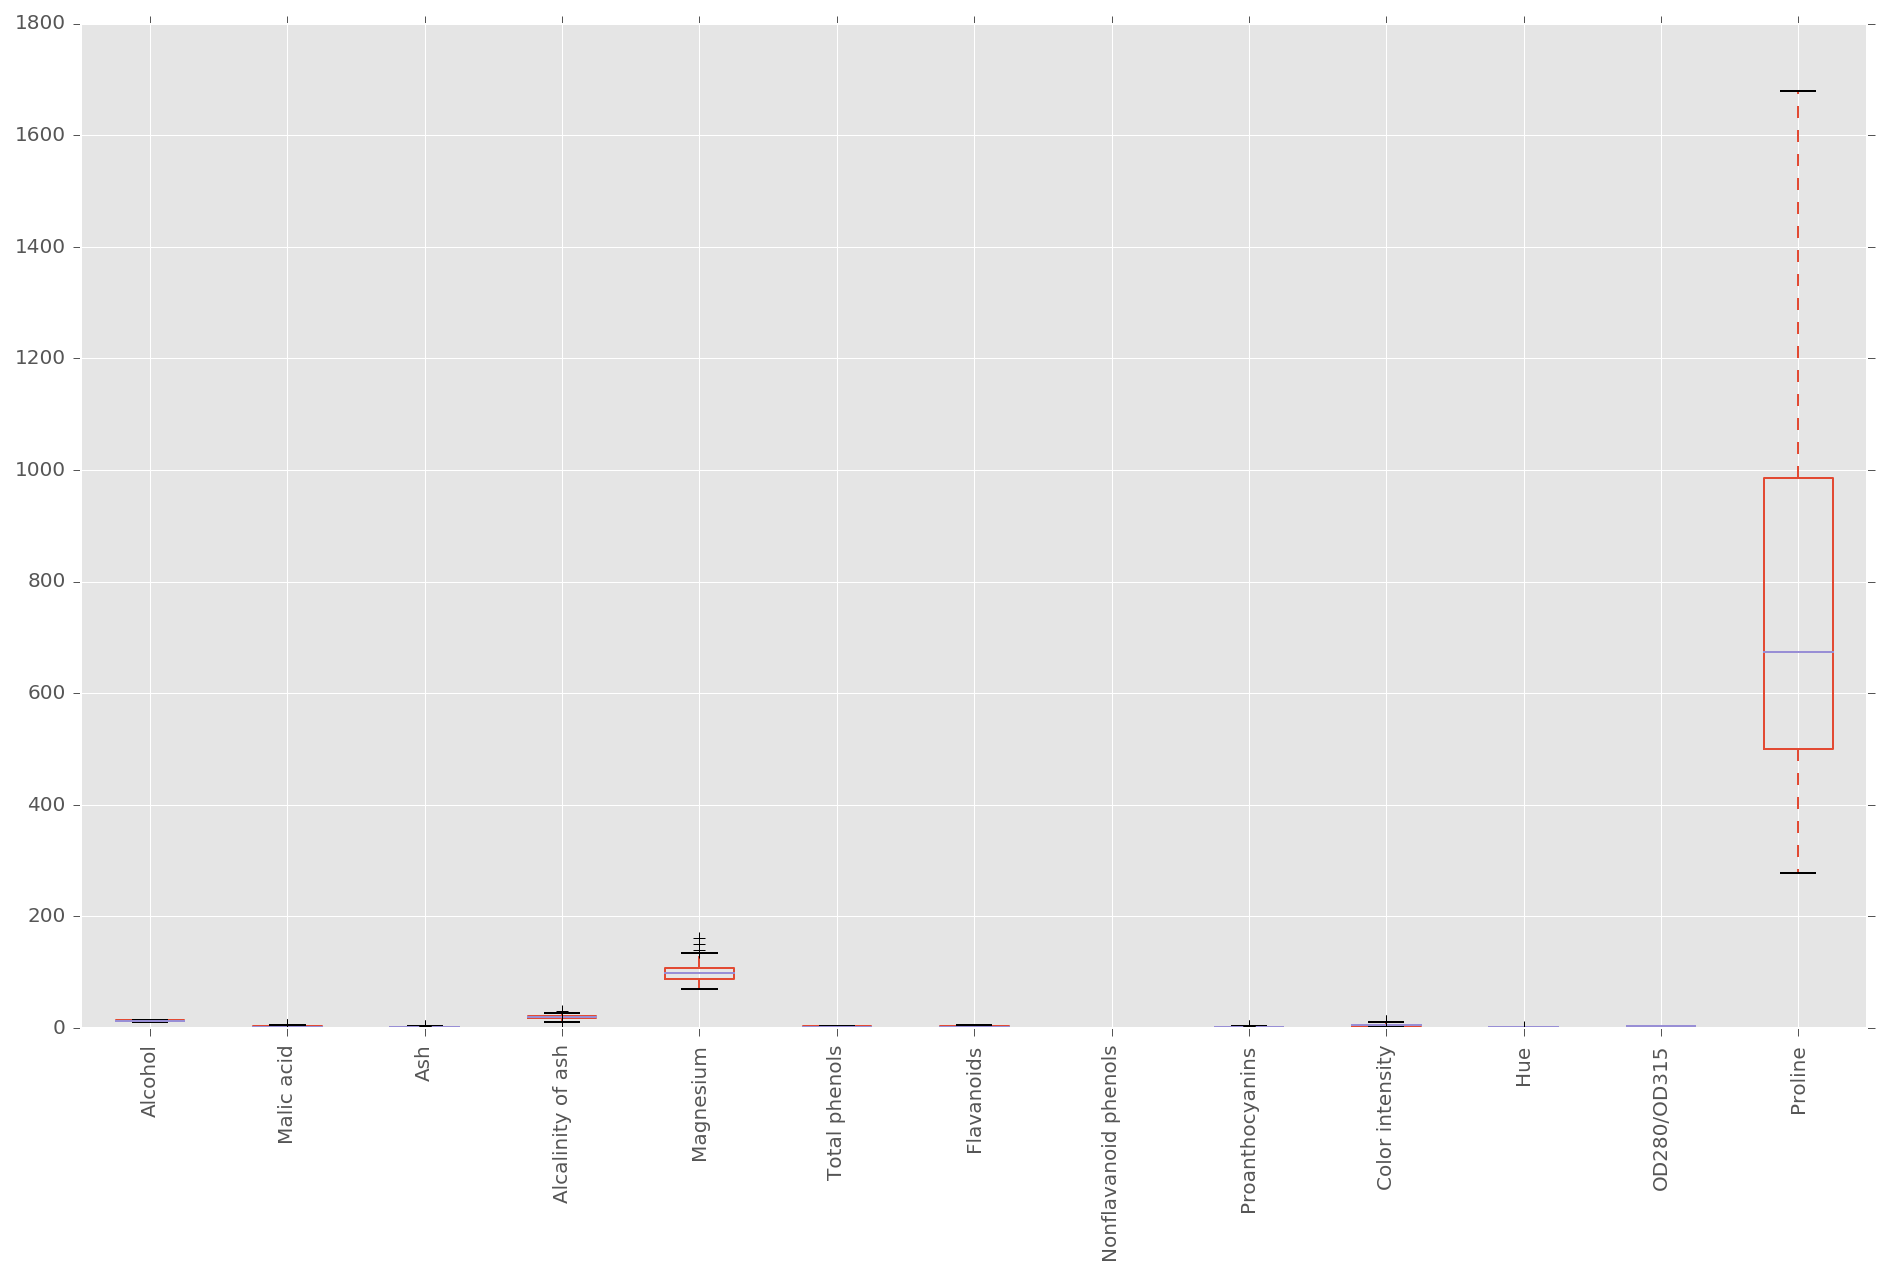

In [159]:
wine_df.boxplot(column=['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', \
              'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315',\
              'Proline'], rot=90)

C:\Users\ella.xenon\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


{'boxes': [<matplotlib.lines.Line2D at 0x2d2eeb890f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2d2eb868160>,
 'fliers': [<matplotlib.lines.Line2D at 0x2d2ec4244a8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2d2ec424160>,
 'whiskers': [<matplotlib.lines.Line2D at 0x2d2eeb89a90>,
  <matplotlib.lines.Line2D at 0x2d2f066a048>]}

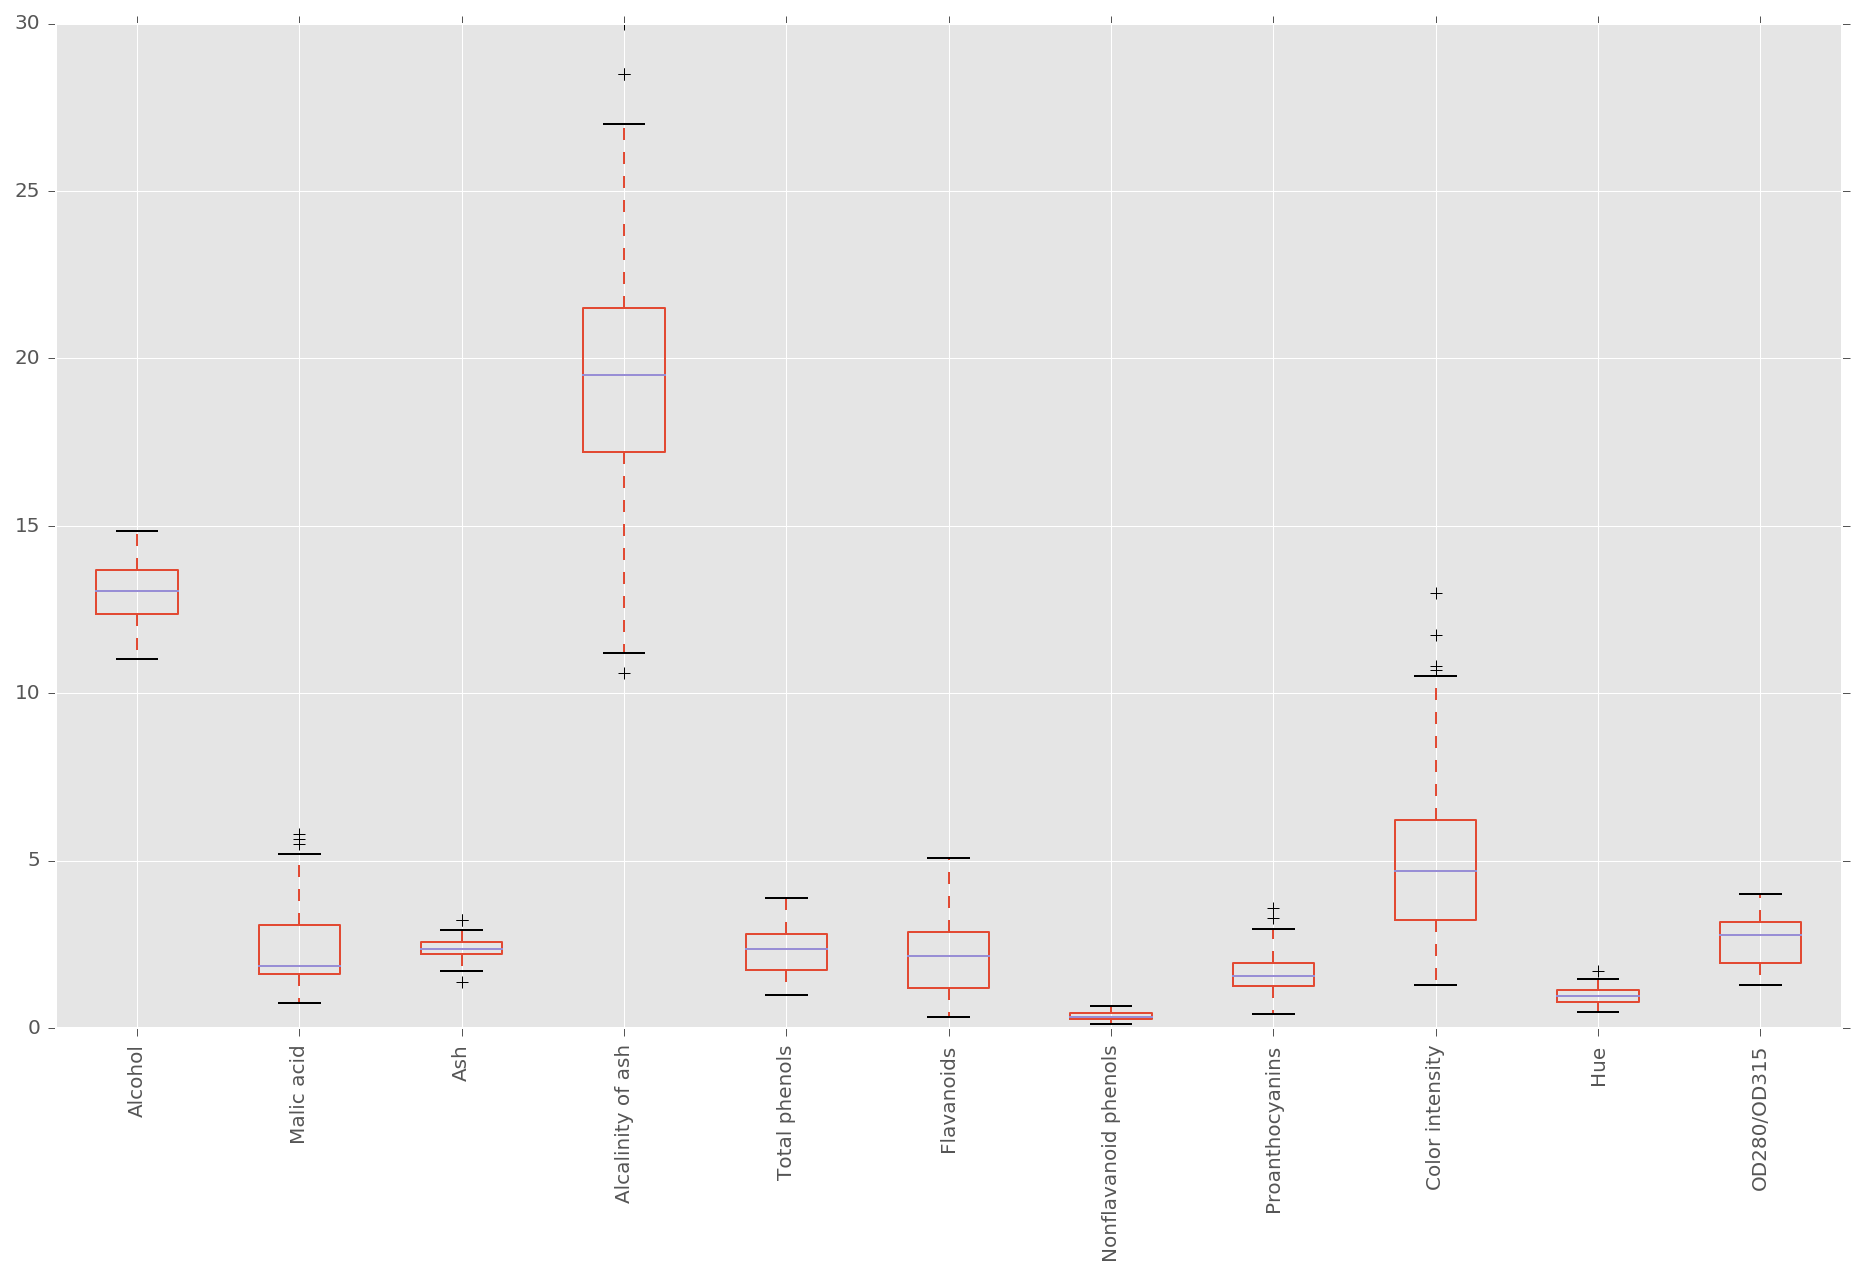

In [160]:
wine_df.boxplot(column=['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Total phenols', \
              'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315'],
               rot=90)

exercsie: 
What is the relationship between flavinoids and total_phenols. Why? 

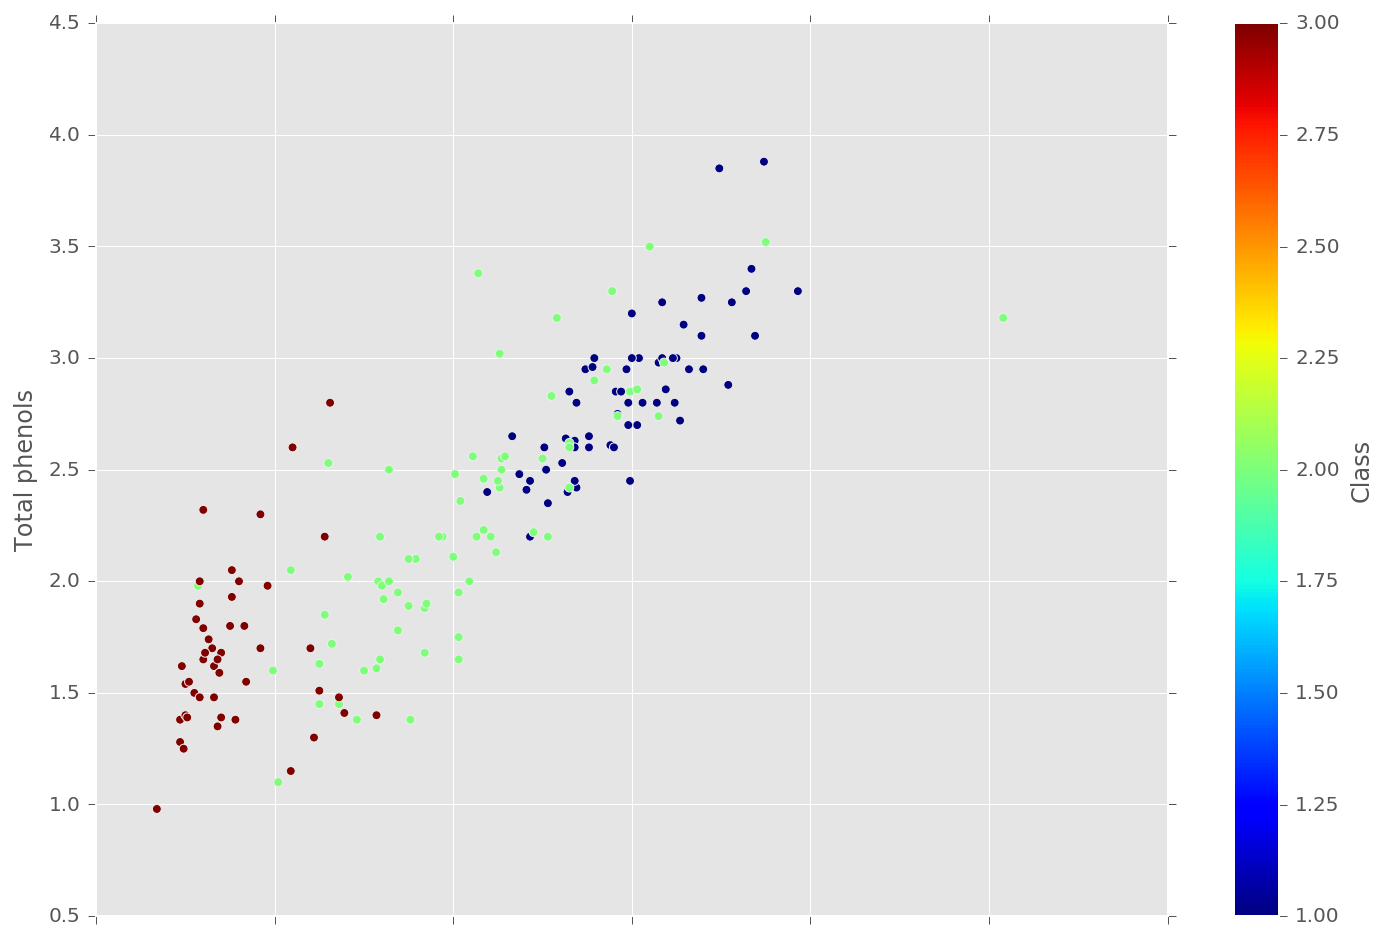

In [161]:
wine_df.plot.scatter(x = 'Flavanoids', y = 'Total phenols', c= 'Class', figsize=(12,8), colormap='jet')

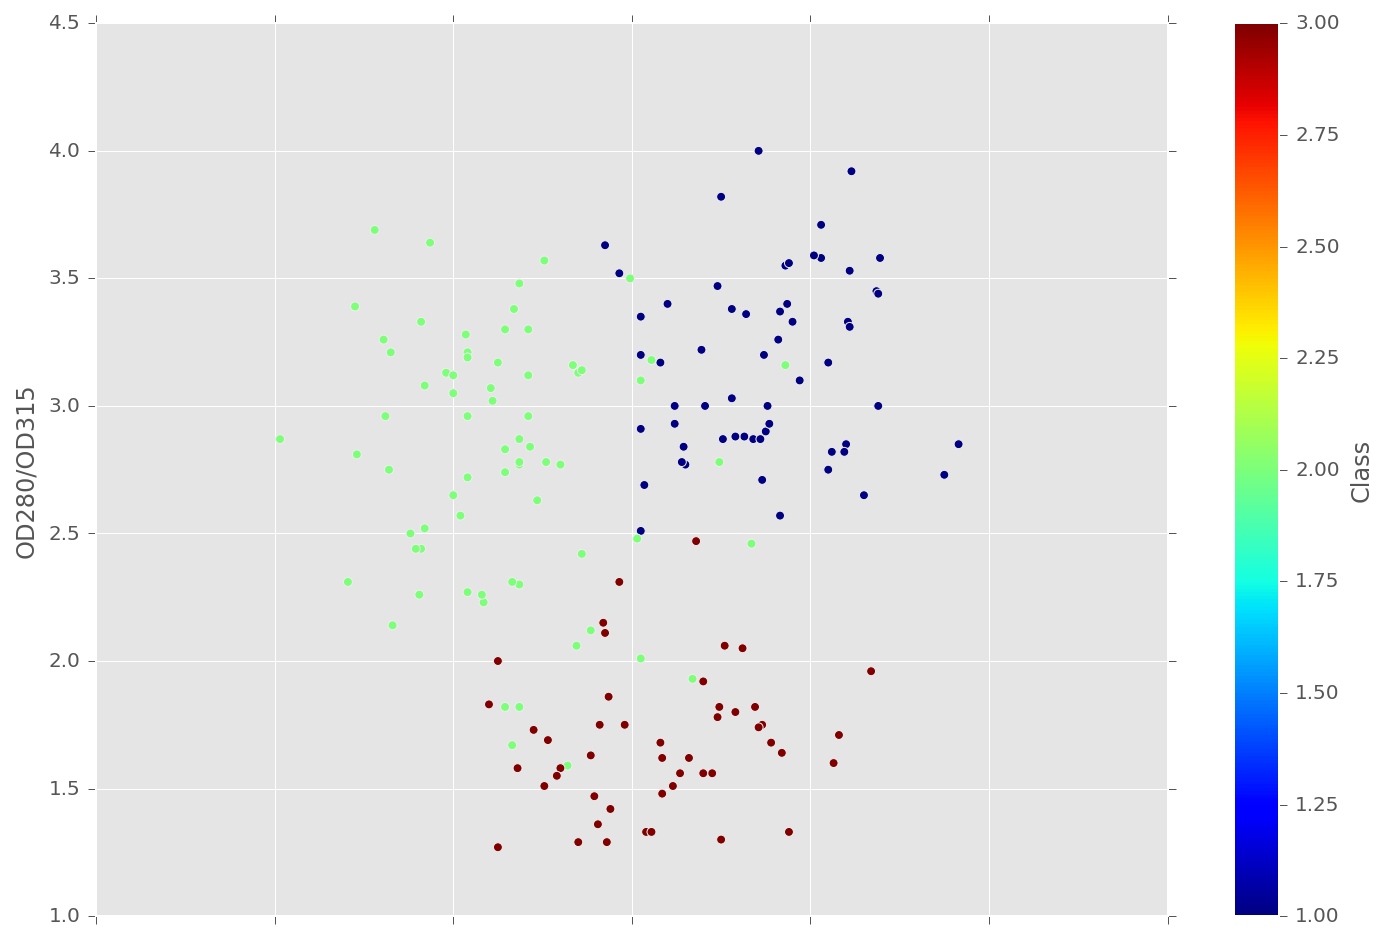

In [162]:
wine_df.plot.scatter(x = 'Alcohol', y = 'OD280/OD315', c= 'Class', figsize=(12,8), colormap='jet')

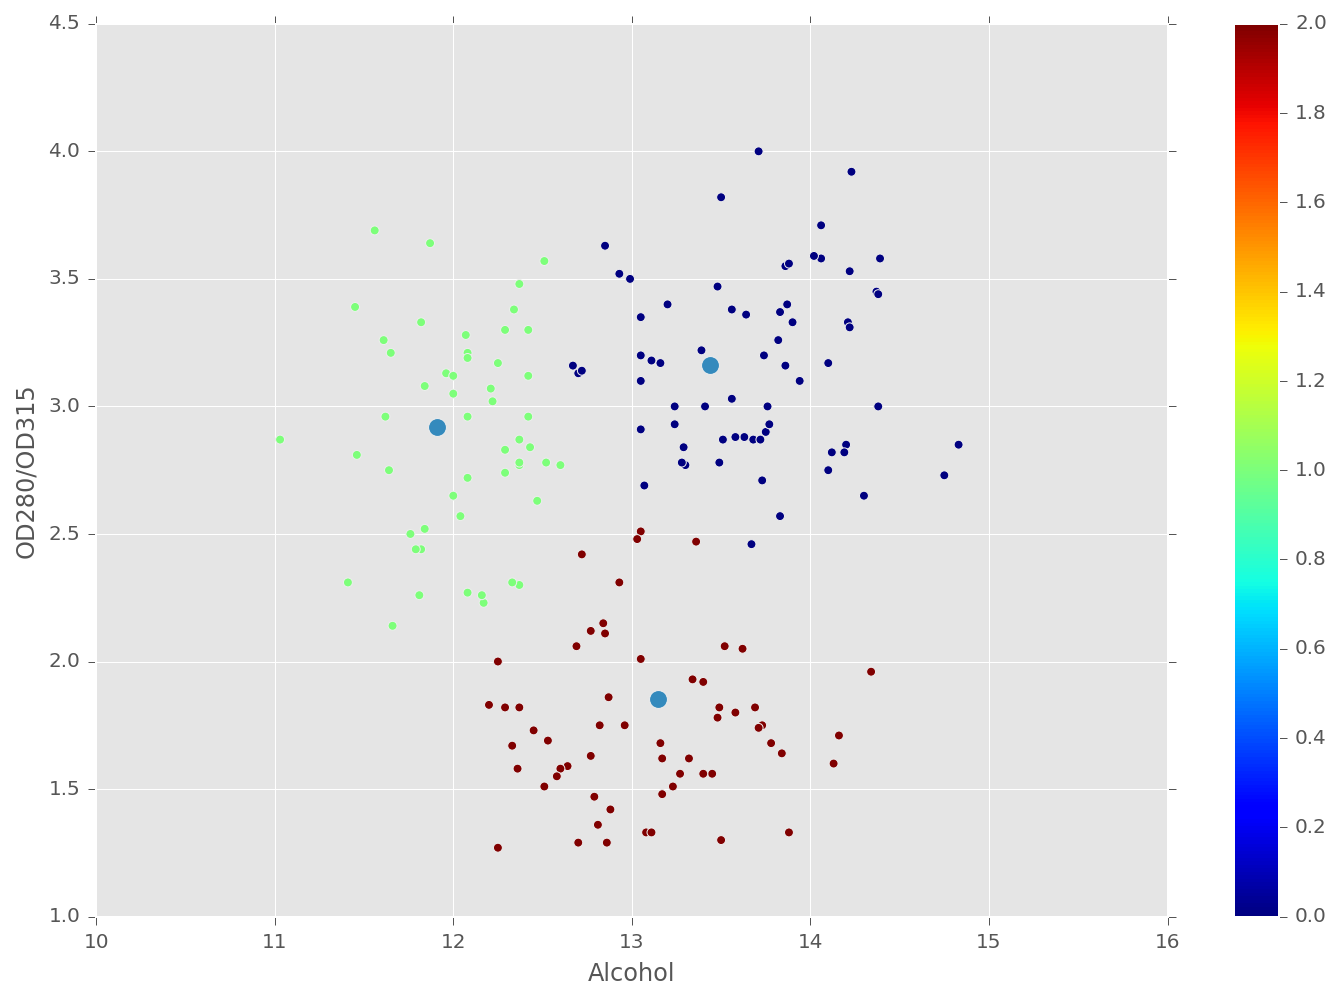

In [163]:
kmeans = KMeans(n_clusters=3, init = 'random', max_iter = 1, random_state = 5).fit(wine_df.iloc[:,[12,1]])
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(wine_df.iloc[:,[12,1]].columns.values))
fig, ax = plt.subplots(1, 1)
wine_df.plot.scatter(x = 'Alcohol', y = 'OD280/OD315', c= kmeans.labels_, figsize=(12,8), colormap='jet', ax=ax, mark_right=False)
centroids_df.plot.scatter(x = 'Alcohol', y = 'OD280/OD315', ax = ax,  s = 80, mark_right=False)

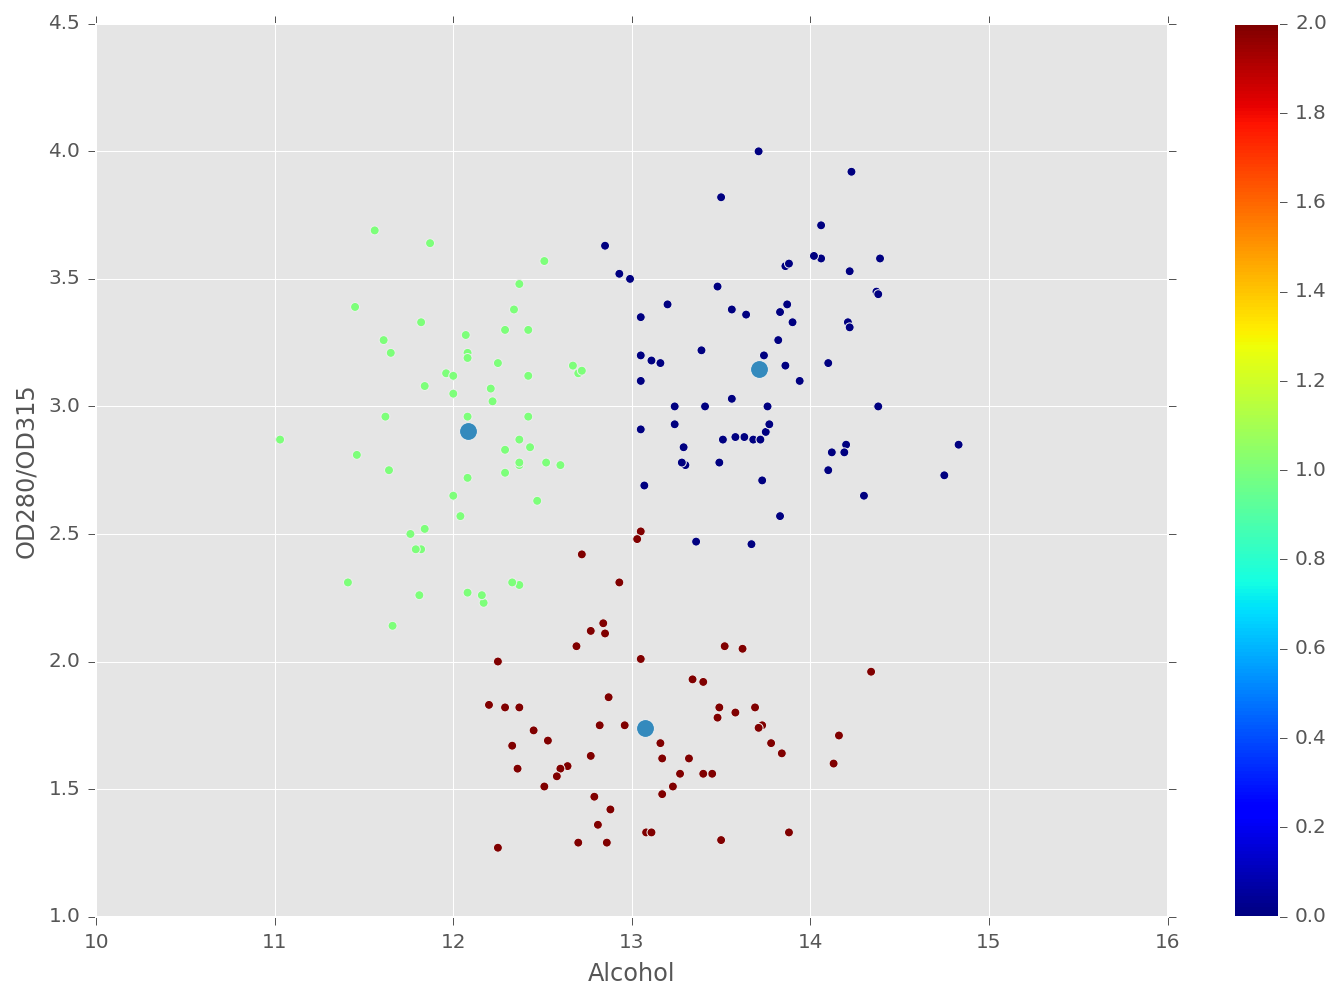

In [164]:
kmeans = KMeans(n_clusters=3, init = 'random', max_iter = 100, random_state = 5).fit(wine_df.iloc[:,[12,1]])
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(wine_df.iloc[:,[12,1]].columns.values))
fig, ax = plt.subplots(1, 1)
wine_df.plot.scatter(x = 'Alcohol', y = 'OD280/OD315', c= kmeans.labels_, figsize=(12,8), colormap='jet', ax=ax, mark_right=False)
centroids_df.plot.scatter(x = 'Alcohol', y = 'OD280/OD315', ax = ax,  s = 80, mark_right=False)

In [165]:
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [166]:
wine_df.iloc[:,1:]

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045


In [259]:
wine_df.iloc[:,1:]

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045


In [167]:
df=wine_df.iloc[:,1:]
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df)
# Create a PCA instance: pca
pca = PCA(n_components=13)
principalComponents = pca.fit_transform(X_std)

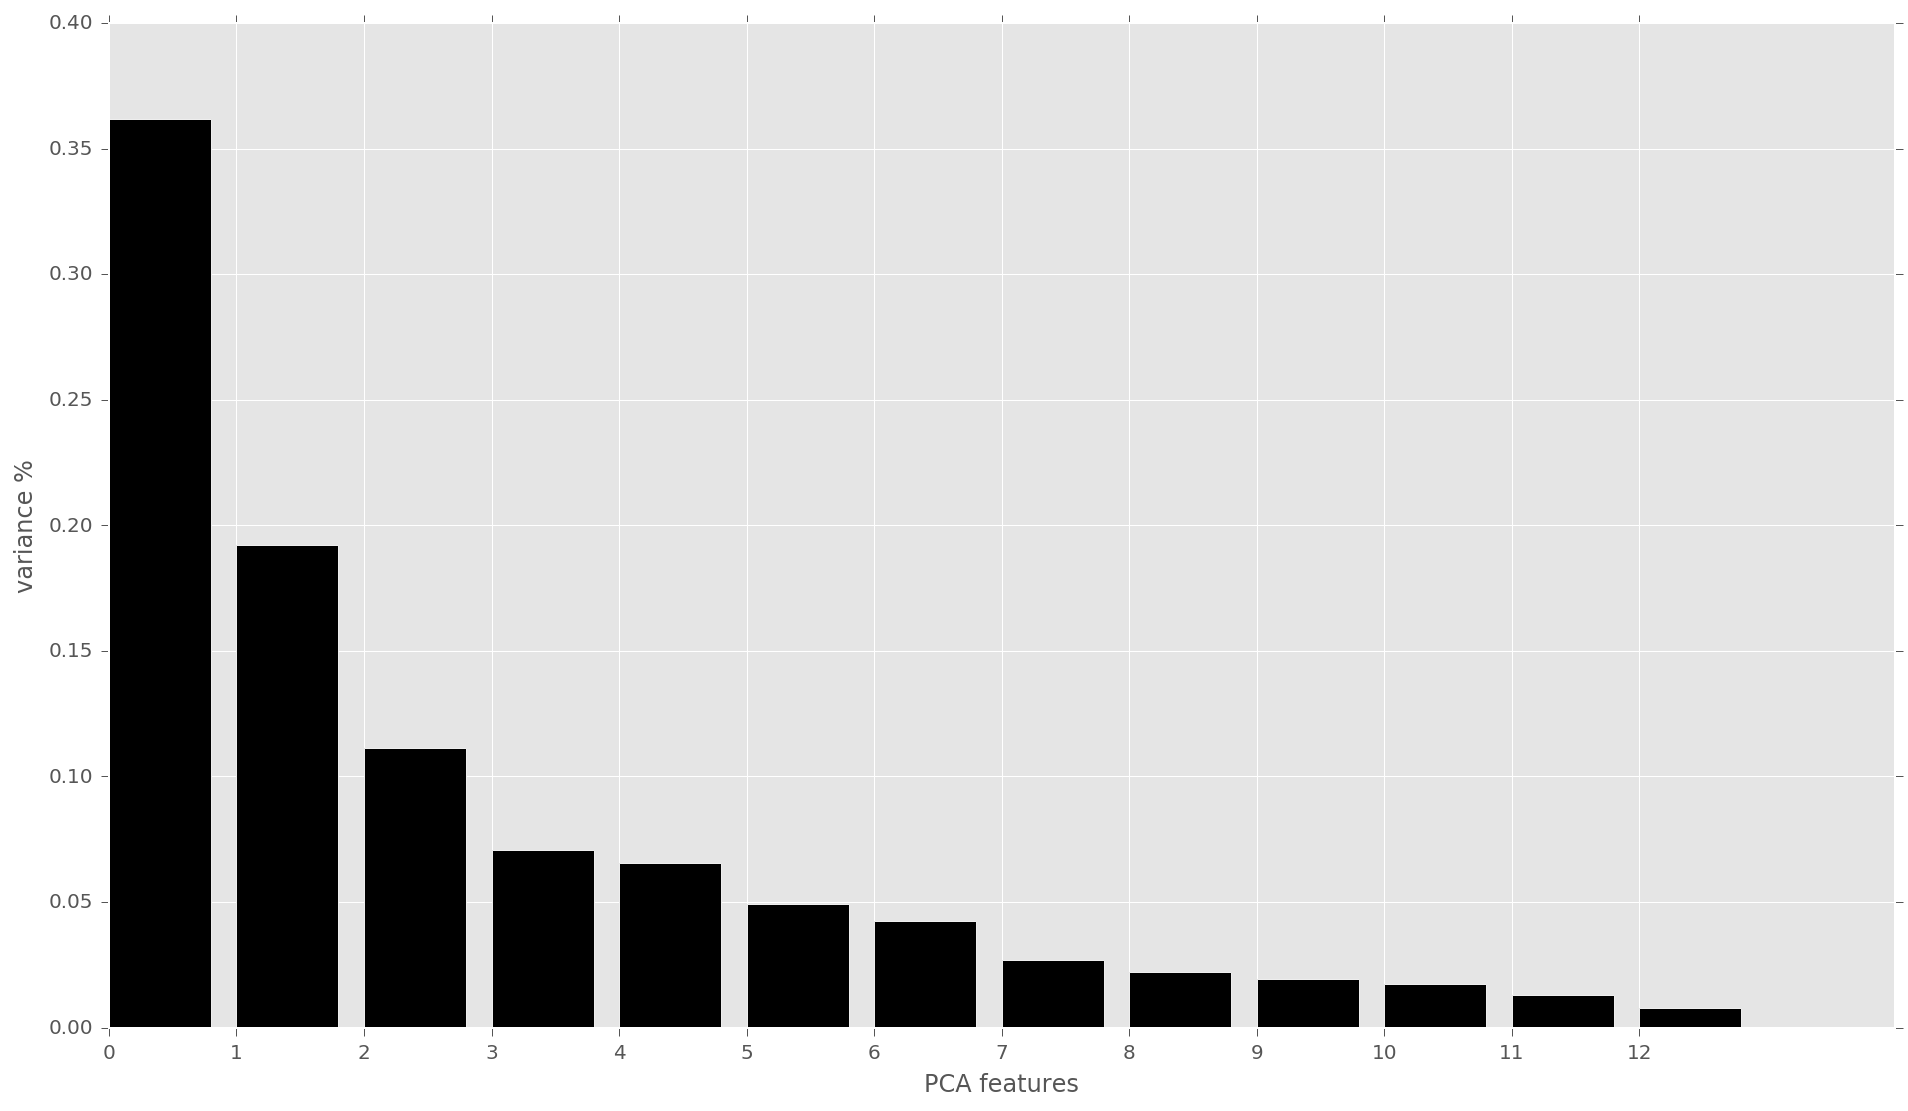

In [168]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'
# Load in the data
df=wine_df.iloc[:,1:]
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df)
# Create a PCA instance: pca
pca = PCA(n_components=13)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

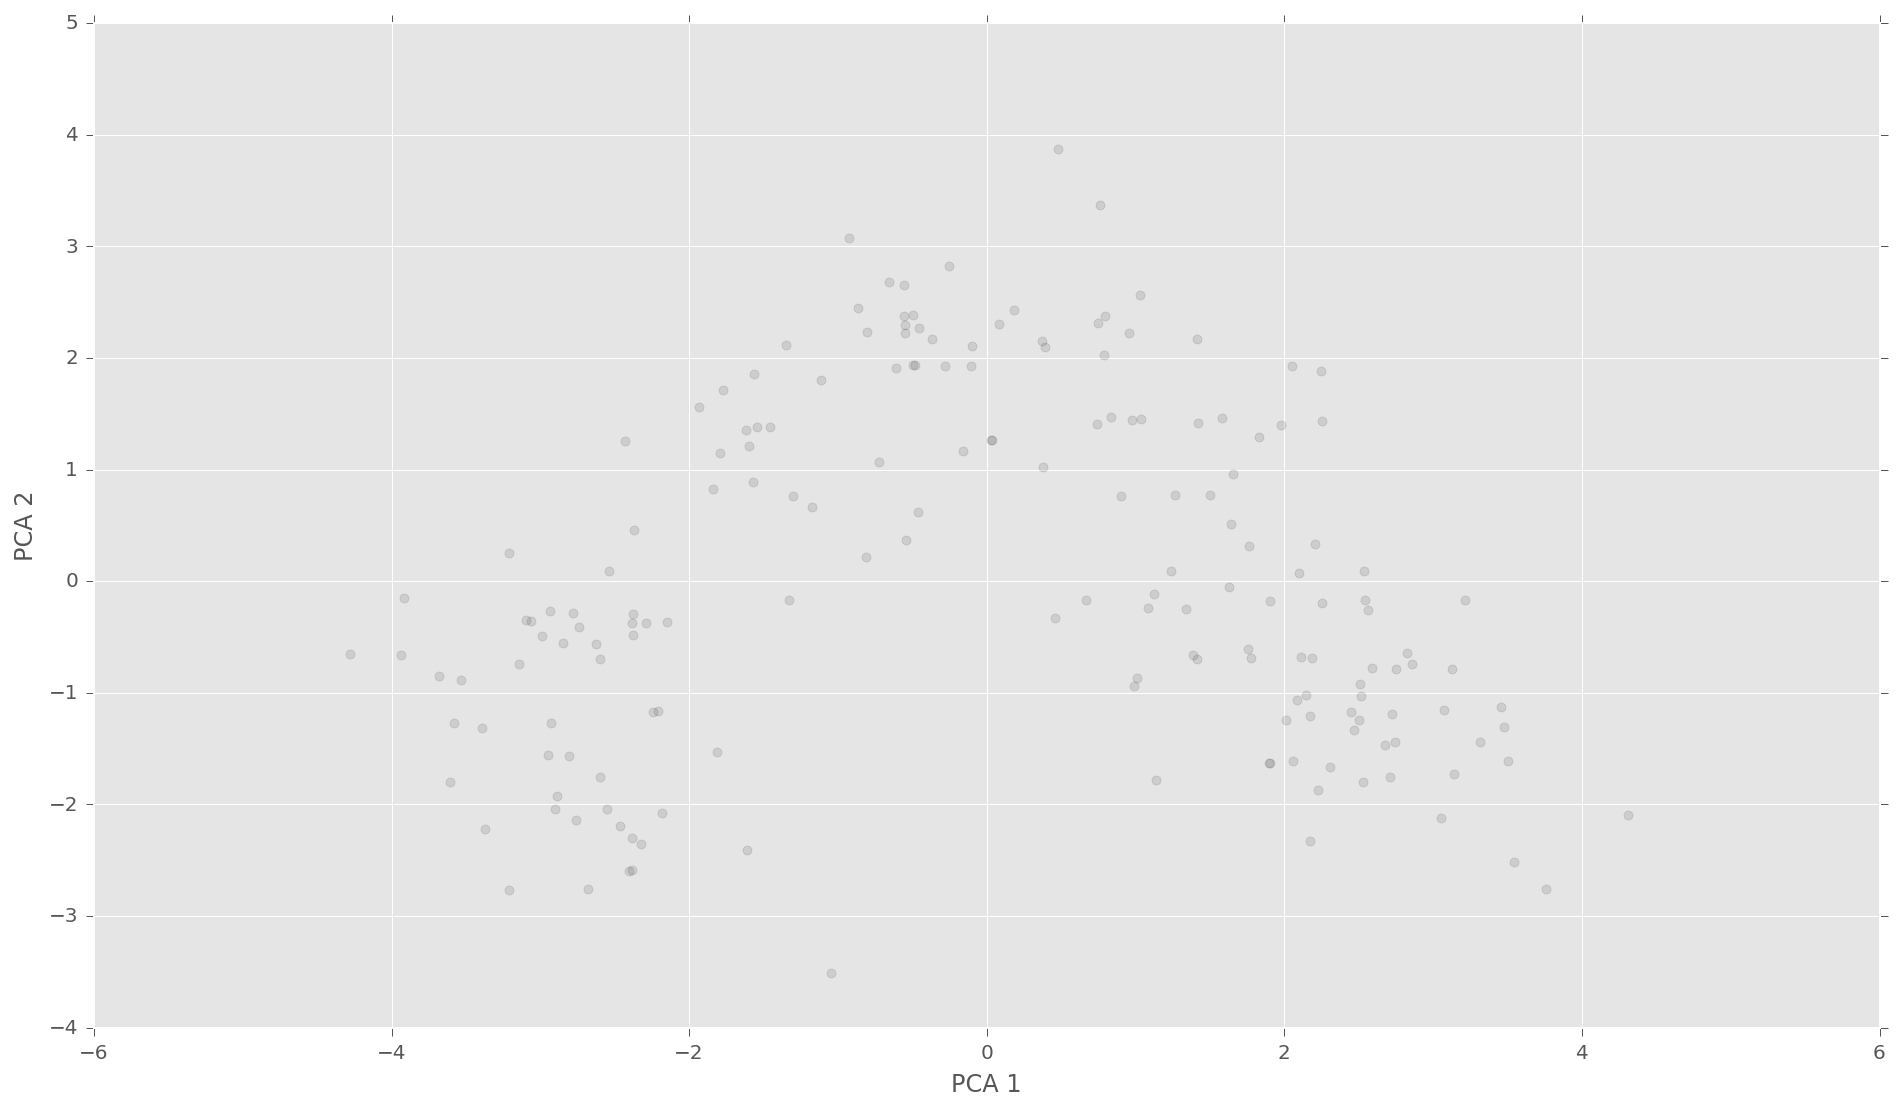

In [169]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

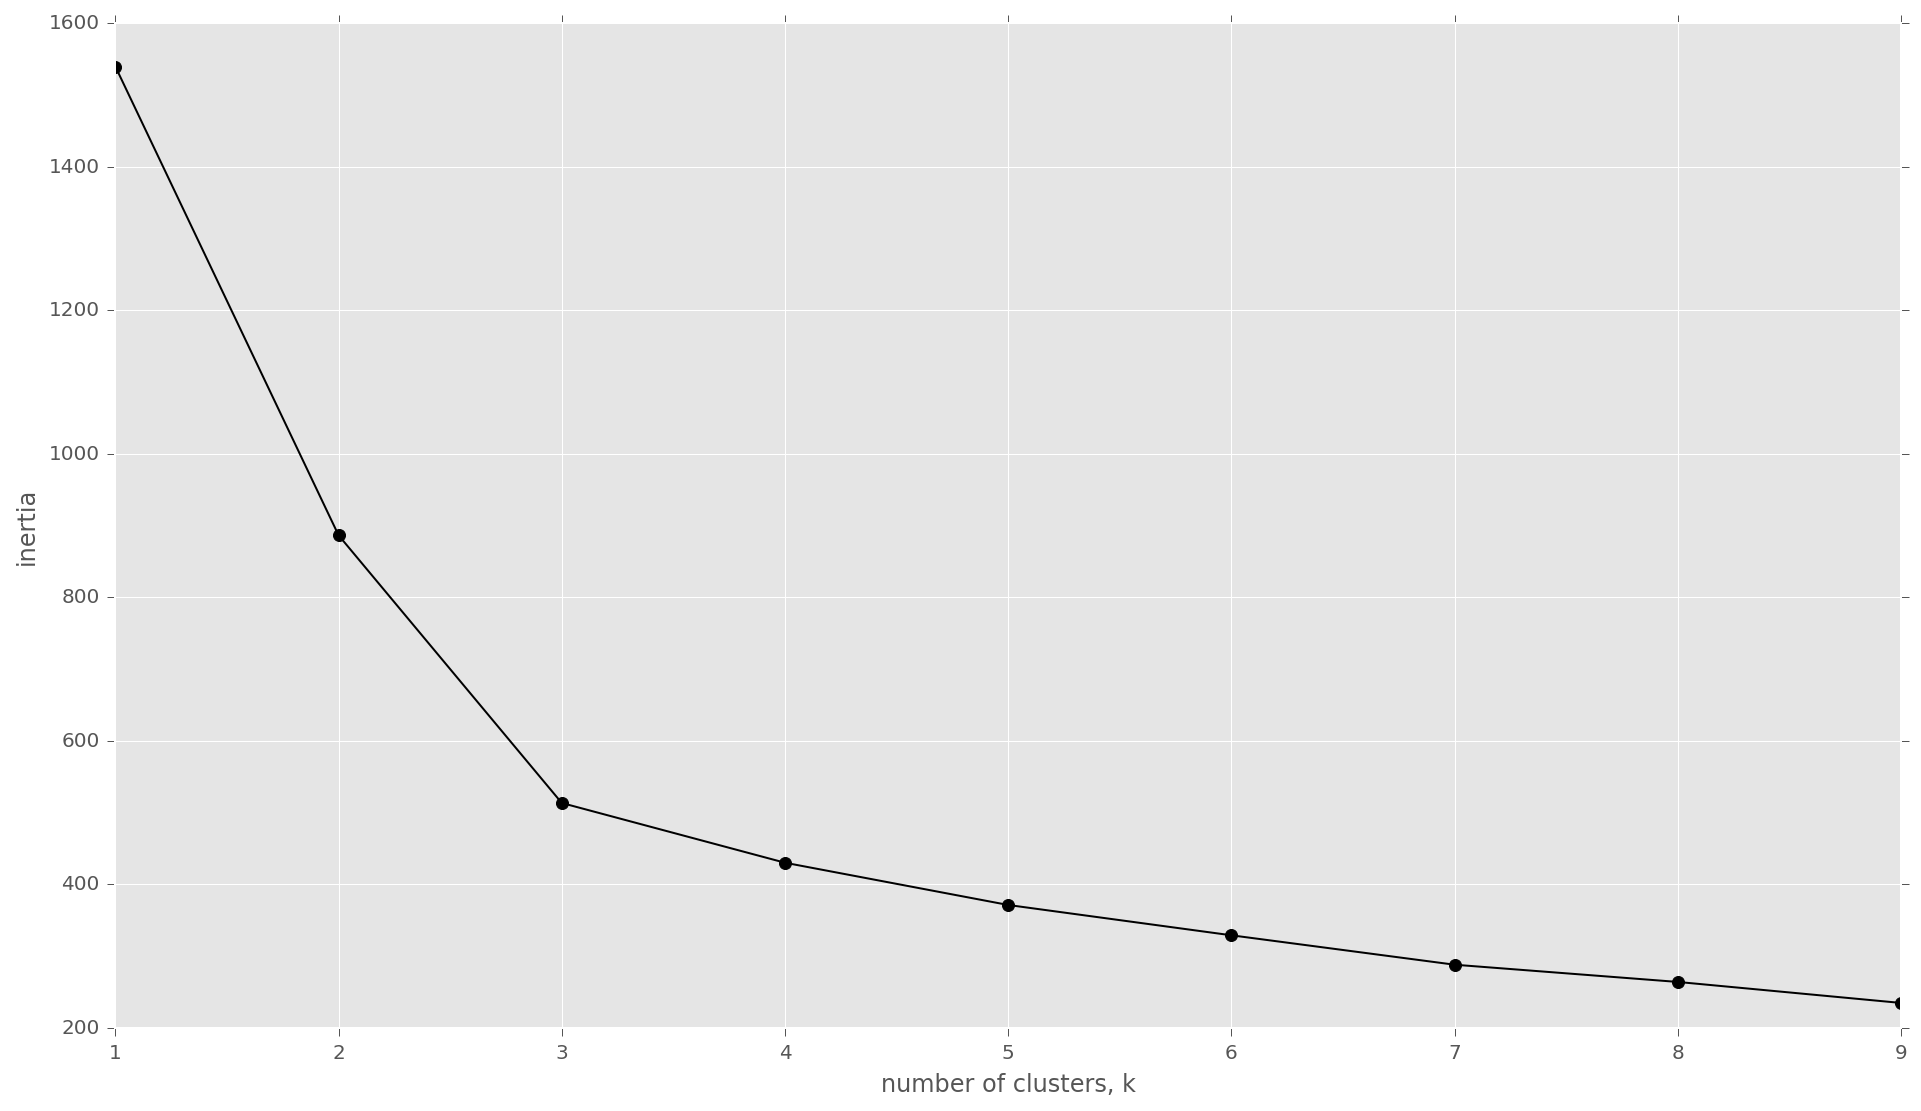

In [170]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [171]:
wine_df['Class']

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
148    3
149    3
150    3
151    3
152    3
153    3
154    3
155    3
156    3
157    3
158    3
159    3
160    3
161    3
162    3
163    3
164    3
165    3
166    3
167    3
168    3
169    3
170    3
171    3
172    3
173    3
174    3
175    3
176    3
177    3
Name: Class, dtype: int64

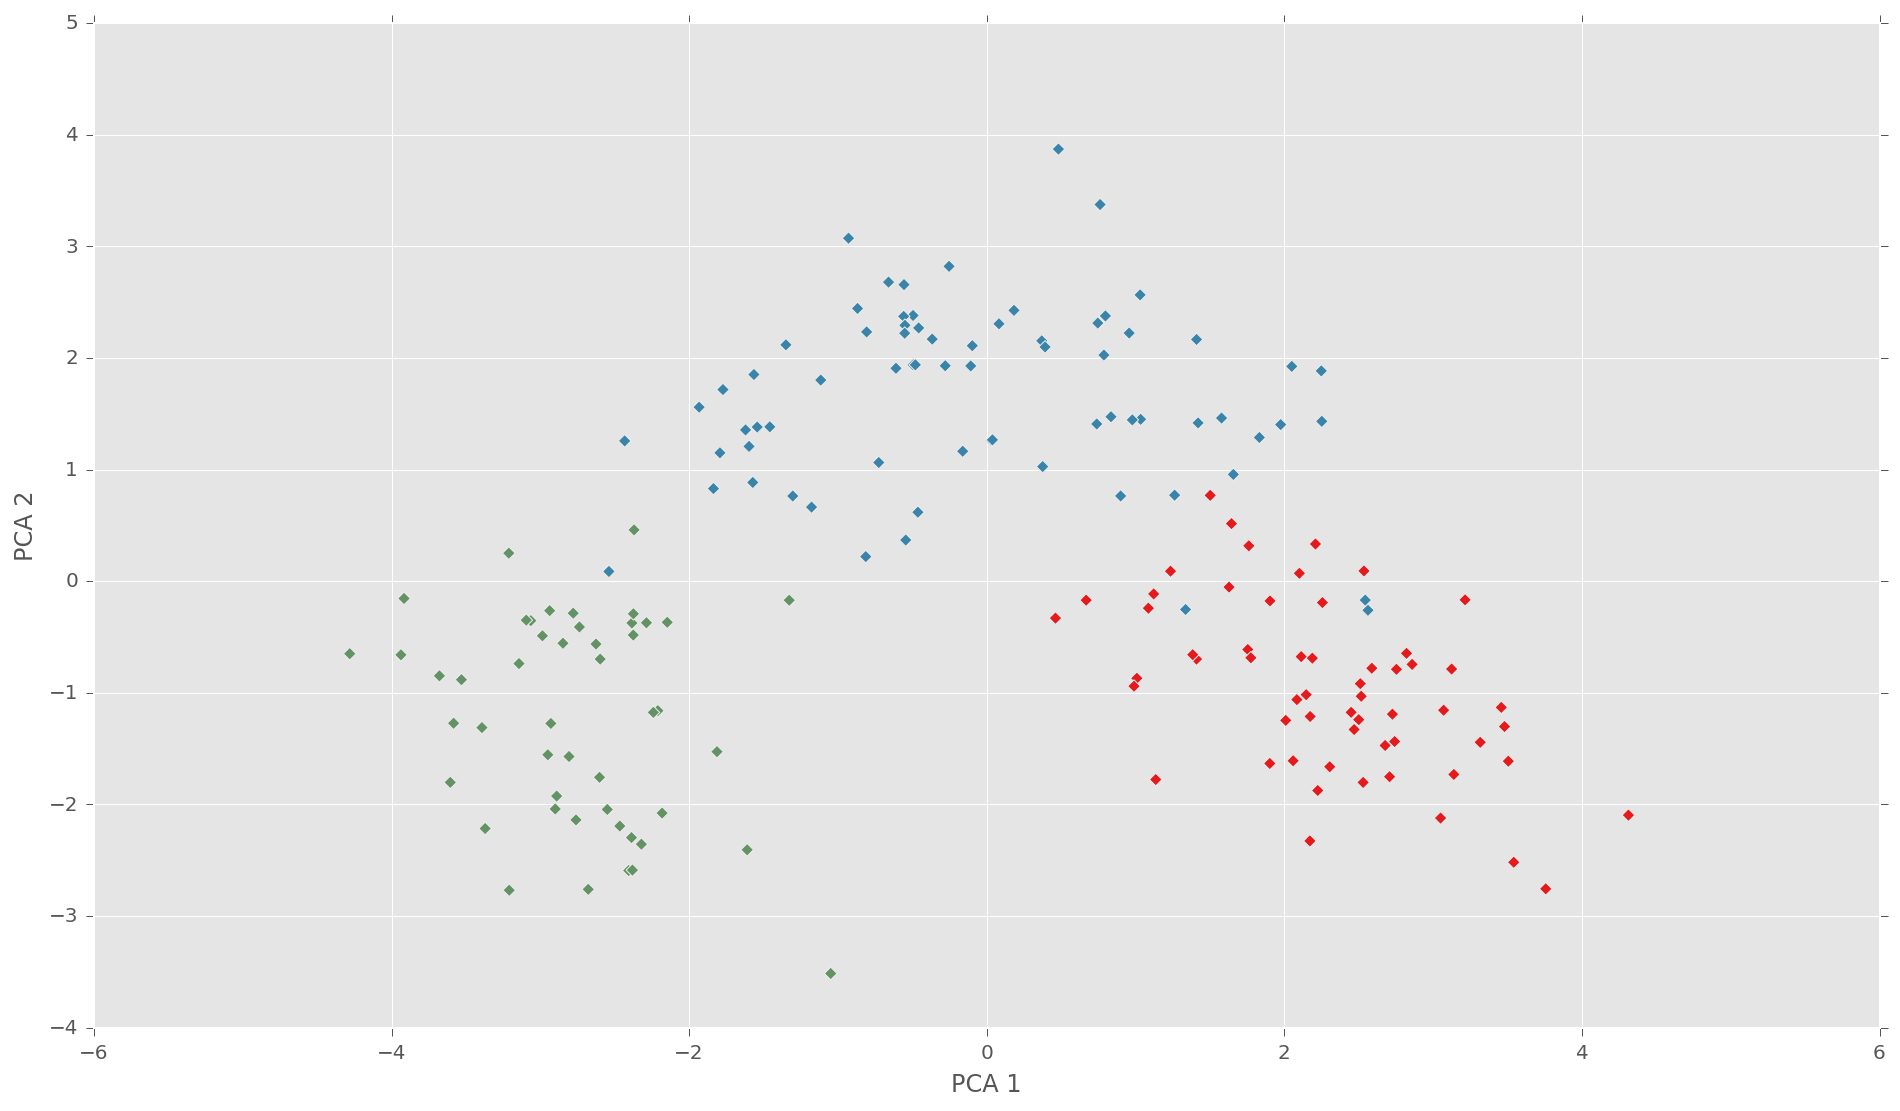

In [172]:
import matplotlib
plt.scatter(PCA_components[0], PCA_components[1], alpha=1, c=wine_df['Class'], cmap='Set1', marker='D', vmax=8)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
#wine_df.plot.scatter(x = 'Alcohol', y = 'OD280/OD315', c= 'Class', figsize=(12,8), colormap='jet')

In [176]:
kmeans = KMeans(n_clusters=3, init = 'random', max_iter = 100, random_state = 5).fit(PCA_components.iloc[:,:3])
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(PCA_components.iloc[:,:3]))

KeyError: '[ 3.31675081  2.20946492  2.51674015  3.75706561  1.00890849  3.05025392\n  2.44908967  2.05943687  2.5108743   2.75362819  3.47973668  1.7547529\n  2.11346234  3.45815682  4.31278391  2.3051882   2.17195527  1.89897118\n  3.54198508  2.0845222   3.12440254  1.08657007  2.53522408  1.64498834\n  1.76157587  0.9900791   1.77527763  1.23542396  2.18840633  2.25610898\n  2.50022003  2.67741105  1.62857912  1.90269086  1.41038853  1.90382623\n  1.38486223  1.12220741  1.5021945   2.52980109  2.58809543  0.66848199\n  3.07080699  0.46220914  2.10135193  1.13616618  2.72660096  2.82133927\n  2.00985085  2.7074913   3.21491747  2.85895983  3.50560436  2.22479138\n  2.14698782  2.46932948  2.74151791  2.17374092  3.13938015 -0.92858197\n -1.54248014 -1.83624976  0.03060683  2.05026161 -0.60968083  0.90022784\n  2.24850719  0.18338403 -0.81280503  1.9756205  -1.57221622  1.65768181\n -0.72537239  2.56222717  1.83256757 -0.8679929   0.3700144  -1.45737704\n  1.26293085  0.37615037  0.7620639   1.03457797 -0.49487676 -2.53897708\n  0.83532015  0.78790461 -0.80683216 -0.55804262 -1.11511104 -0.55572283\n -1.34928528 -1.56448261 -1.93255561  0.74666594  0.95745536  2.54386518\n -0.54395259  1.03104975  2.25190942  1.41021602  0.79771979 -0.54953173\n -0.16117374 -0.65979494  0.39235441 -1.77249908 -0.36626736 -1.62067257\n  0.08253578  1.57827507  1.42056925 -0.27870275 -1.30314497 -0.45707187\n -0.49418585  0.48207441 -0.25288888 -0.10722764 -2.4330126  -0.55108954\n  0.73962193  1.33632173 -1.177087   -0.46233501  0.97847408 -0.09680973\n  0.03848715 -1.5971585  -0.47956492 -1.79283347 -1.32710166 -2.38450083\n -2.9369401  -2.14681113 -2.36986949 -3.06384157 -3.91575378 -3.93646339\n -3.09427612 -2.37447163 -2.77881295 -2.28656128 -2.98563349 -2.3751947\n -2.20986553 -2.625621   -4.28063878 -3.58264137 -2.80706372 -2.89965933\n -2.32073698 -2.54983095 -1.81254128 -2.76014464 -2.7371505  -3.60486887\n -2.889826   -3.39215608 -1.0481819  -1.60991228 -3.14313097 -2.2401569\n -2.84767378 -2.59749706 -2.94929937 -3.53003227 -2.40611054 -2.92908473\n -2.18141278 -2.38092779 -3.21161722 -3.67791872 -2.4655558  -3.37052415\n -2.60195585 -2.67783946 -2.38701709 -3.20875816] not in index'

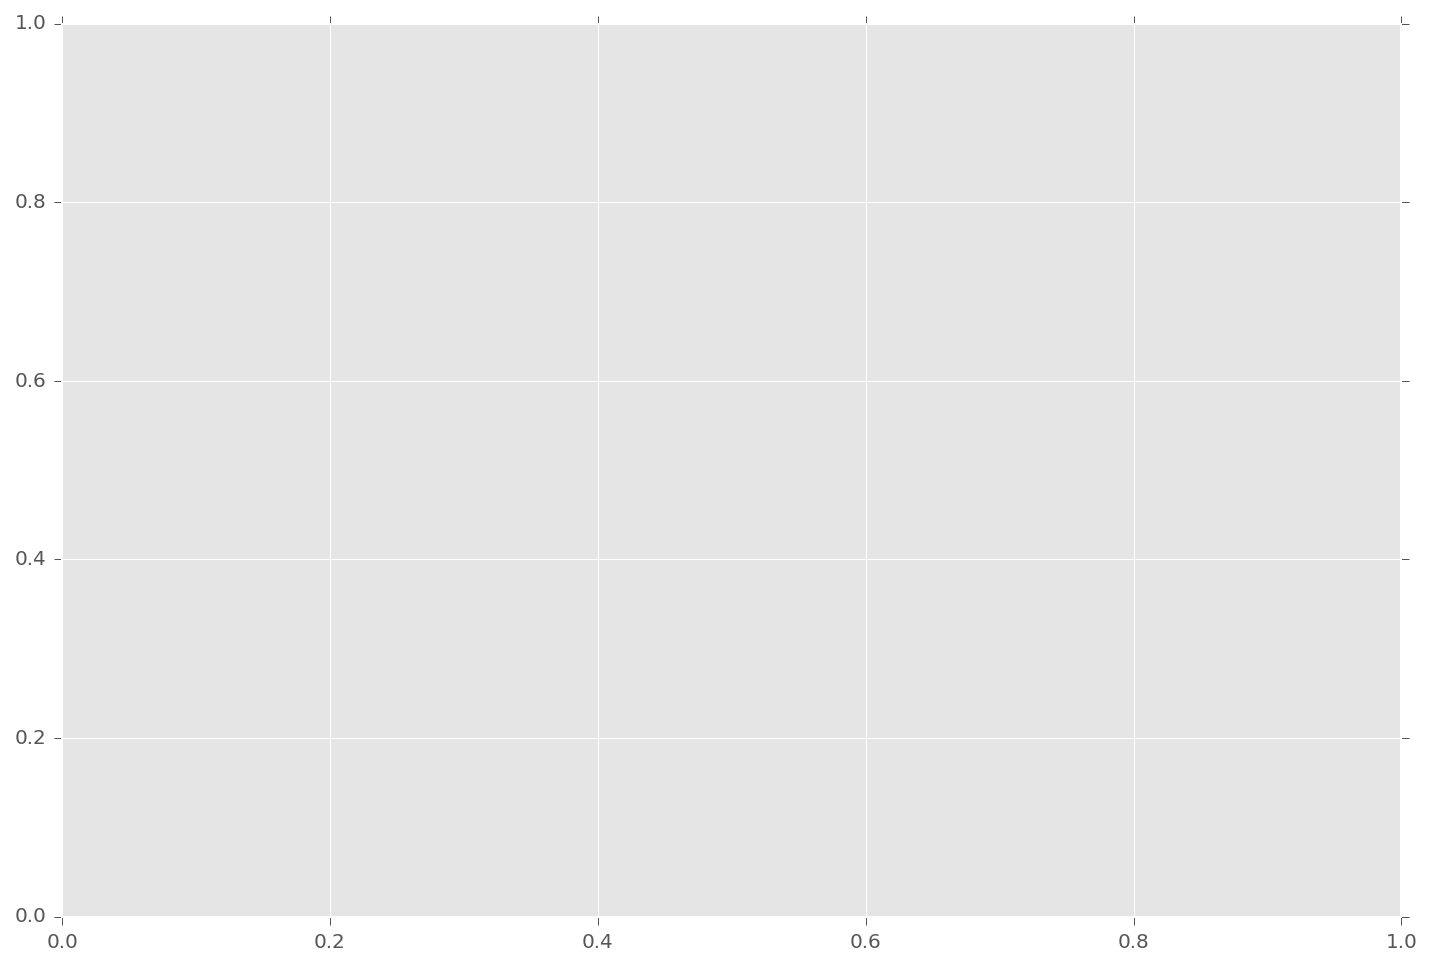

In [175]:
kmeans = KMeans(n_clusters=3, init = 'random', max_iter = 100, random_state = 5).fit(PCA_components.iloc[:,:3])
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(PCA_components.iloc[:,:3]))
fig, ax = plt.subplots(1, 1)
df.plot.scatter(PCA_components[0], PCA_components[1], c= kmeans.labels_, figsize=(12,8), colormap='jet', ax=ax, mark_right=False)
centroids_df.plot.scatter(PCA_components[0], PCA_components[1], ax = ax,  s = 80, mark_right=False)